# **FINAL PROJECT - KELOMPOK 7**

## **-- Home Credit Default Risk --**

# **Business Understanding**

Home Credit adalah perusahaan yang fokus pada penyediaan layanan kredit konsumen kepada individu yang memiliki akses terbatas ke layanan keuangan tradisional, terutama mereka yang tidak memiliki riwayat kredit atau memiliki riwayat kredit yang buruk.

Bentuk Model bisnis Home Credit ialah menyediakan pinjaman konsumen melalui penjualan ritel. Mereka menjalin kemitraan dengan berbagai toko ritel, dealer mobil, dan penyedia layanan lainnya untuk menawarkan pembiayaan langsung kepada pelanggan mereka di tempat.


**Problem Statement**

Kejadian default (pelanggan tidak dapat melakukan pembayaran tepat waktu) adalah salah satu masalah utama yang dapat terjadi pada perusahaan ini. Dari data yang didapat membuktikan sebanyak 91% pelanggan Home Credit masih belum bisa melakukan pembayaran dengan tepat waktu


**Objectives**




1.   Mengurangi dan menghindari pelanggan yang gagal melakukan pembayaran pinjaman
2.   Meningkatkan jumlah pelanggan Home Credit yang mampu mengembalikan pinjamannya
3. Membuat model klasifikasi pelanggan berdasarkan kemampuan pelanggan untuk melakukan
pembayaran tepat waktu dan menghindari kejadian gagal bayar.


Dengan mengklasifikasikan pelanggan, Home Credit menjadi lebih mudah menyetujui pinjaman untuk pelanggan yang lebih mungkin membayar tepat waktu untuk meningkatkan kepuasan pelanggan, memperkuat loyalitas pelanggan, dan meningkatkan referensi dari mulut ke mulut yang positif.

**Goals**

Memaksimalkan pembayaran pinjaman dan meminimalkan kerugian, sehingga meningkatkan kinerja keuangan perusahaan. Selain itu, Home Credit dapat memberikan pengalaman pelanggan yang lebih baik.

# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
application = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_train.csv')

In [ ]:
#Pandas show all column
pd.set_option('display.max_columns',200)

application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
# Total row and column
application.shape

(307511, 122)

# Data Understanding - Exploratory Data Analysis (EDA)

> ## Deskripsi Dataset

**1.   application_{train|test}.csv**
*   Ini adalah tabel utama, dipecah menjadi dua file untuk Train (dengan TARGET) dan Test (tanpa TARGET).
*   Data statis untuk semua pengajuan. Satu baris mewakili satu pinjaman dalam sampel data.

**2.   bureau.csv**
*   Semua kredit klien sebelumnya yang diberikan oleh lembaga keuangan lain yang dilaporkan ke Biro Kredit (untuk klien yang memiliki pinjaman dalam sampel).
*   Untuk setiap pinjaman dalam sampel kami, ada sebanyak baris jumlah kredit yang dimiliki klien di Biro Kredit sebelum tanggal pengajuan.

**3.   bureau_balance.csv**
*   Saldo bulanan kredit sebelumnya di Biro Kredit.
*   Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya yang dilaporkan ke Biro Kredit – yaitu tabel memiliki (#loans dalam sampel * # kredit relatif sebelumnya * # bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk kredit sebelumnya) baris.

**4.   POS_CASH_balance.csv**
*   Snapshot saldo bulanan dari POS sebelumnya (point of sales) dan pinjaman tunai yang dimiliki pemohon dengan Home Credit.
*   Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya dalam Kredit Rumah (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman dalam sampel kami – yaitu tabel memiliki (#loans dalam sampel * # kredit relatif sebelumnya * # bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk kredit sebelumnya) baris.

**5.   credit_card_balance.csv**
*   Snapshot saldo bulanan dari kartu kredit sebelumnya yang dimiliki pemohon dengan Home Credit.
*   Snapshot saldo bulanan dari kartu kredit sebelumnya yang dimiliki pemohon dengan Home Credit.
Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya dalam Kredit Rumah (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman dalam sampel kami - yaitu tabel memiliki (#loans dalam sampel * # kartu kredit relatif sebelumnya * # bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk kartu kredit sebelumnya) baris.

**6.   previous_application.csv**
*   Semua pengajuan sebelumnya untuk pinjaman Home Credit klien yang memiliki pinjaman dalam sampel.
*   Ada satu baris untuk setiap pengajuan sebelumnya yang terkait dengan pinjaman dalam sampel data.

**7.  installments_payments.csv**
*   Riwayat pembayaran untuk kredit yang dicairkan sebelumnya dalam Kredit Rumah terkait dengan pinjaman dalam sampel.
*   a) satu baris untuk setiap pembayaran yang dilakukan ditambah b) satu baris masing-masing untuk pembayaran yang terlewat.
*  Satu baris setara dengan satu pembayaran satu angsuran atau satu angsuran yang sesuai dengan satu pembayaran satu kredit Kredit Rumah sebelumnya yang terkait dengan pinjaman dalam sampel kami.

**8.  HomeCredit_columns_description.csv**
*   File ini berisi deskripsi untuk kolom di berbagai file data.



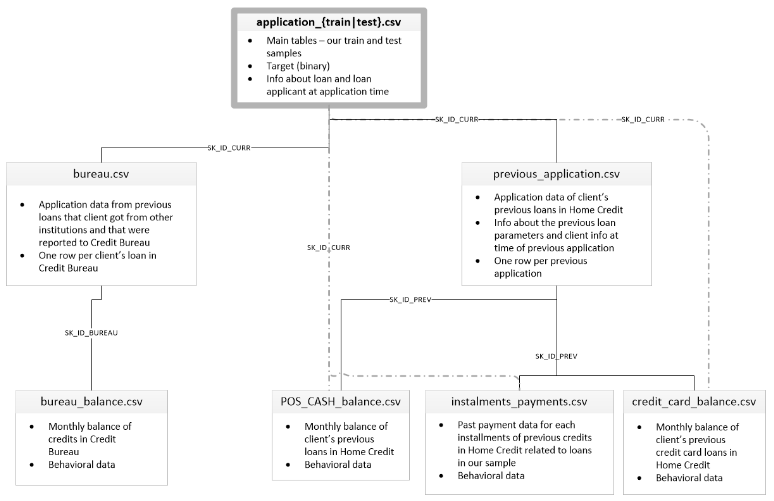

In [ ]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
#drop irrelevant columns
application=application.drop(columns=['SK_ID_CURR'])

In [ ]:
info_train = pd.DataFrame(application.dtypes, columns=['Dtypes'])
pd.set_option('display.max_row',200)
info_train

Dtypes
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
REGION_RATING_CLIENT_W_CITY     int64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
REG_REGION_NOT_LIVE_REGION      int64
REG_REGION_NOT_WORK_REGION      int64
LIVE_REGION_NOT_WORK_REGION     int64
REG_CITY_NOT_LIVE_CITY          int64
REG_CITY_NOT_WORK_CITY          int64
LIVE_CITY_NOT_WORK_CITY         int64
ORGANIZATION_TYPE              object
EXT_SOURCE_1                  float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
APARTMENTS_AVG                float64
BASEMENTAREA_AVG              float64
YEARS_BEGINEXPLUATATION_AVG   float64
YEARS_BUILD_AVG               float64
COMMONAREA_AVG                float64
ELEVATORS_AVG                 float64
ENTRANCES_AVG                 float64
FLOORSMAX_AVG                 float64
FLOORSMIN_AVG                 float64
LANDAREA_AVG                  float64
LIVINGAPARTMENTS_AVG          float64
LIVINGAREA_AVG                float64
NONLIVINGAPARTMENTS_AVG       float64
NONLIVINGAREA_AVG             float64
APARTMENTS_MODE               float64
BASEMENTAREA_MODE             float64
YEARS_BEGINEXPLUATATION_MODE  float64
YEARS_BUILD_MODE              float64
COMMONAREA_MODE               float64
ELEVATORS_MODE                float64
ENTRANCES_MODE                float64
FLOORSMAX_MODE                float64
FLOORSMIN_MODE                float64
LANDAREA_MODE                 float64
LIVINGAPARTMENTS_MODE         float64
LIVINGAREA_MODE               float64
NONLIVINGAPARTMENTS_MODE      float64
NONLIVINGAREA_MODE            float64
APARTMENTS_MEDI               float64
BASEMENTAREA_MEDI             float64
YEARS_BEGINEXPLUATATION_MEDI  float64
YEARS_BUILD_MEDI              float64
COMMONAREA_MEDI               float64
ELEVATORS_MEDI                float64
ENTRANCES_MEDI                float64
FLOORSMAX_MEDI                float64
FLOORSMIN_MEDI                float64
LANDAREA_MEDI                 float64
LIVINGAPARTMENTS_MEDI         float64
LIVINGAREA_MEDI               float64
NONLIVINGAPARTMENTS_MEDI      float64
NONLIVINGAREA_MEDI            float64
FONDKAPREMONT_MODE             object
HOUSETYPE_MODE                 object
TOTALAREA_MODE                float64
WALLSMATERIAL_MODE             object
EMERGENCYSTATE_MODE            object
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
FLAG_DOCUMENT_2                 int64
FLAG_DOCUMENT_3                 int64
FLAG_DOCUMENT_4                 int64
FLAG_DOCUMENT_5                 int64
FLAG_DOCUMENT_6                 int64
FLAG_DOCUMENT_7                 int64
FLAG_DOCUMENT_8                 int64
FLAG_DOCUMENT_9                 int64
FLAG_DOCUMENT_10                int64
FLAG_DOCUMENT_11                int64
FLA

In [ ]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


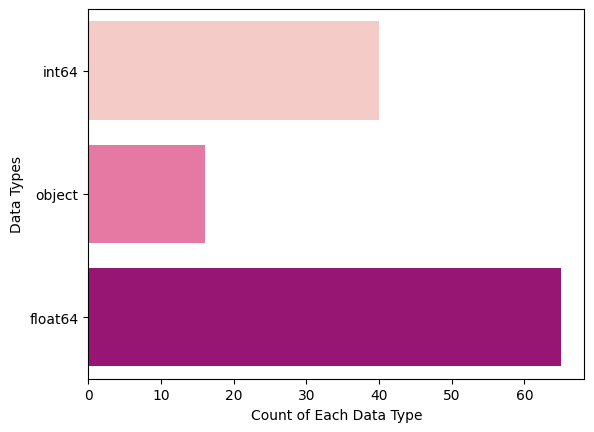

In [ ]:
#Menghitung jumlah tipe data dalam dataset
sns.countplot(y=application.dtypes ,data=application, palette='RdPu')
plt.xlabel("Count of Each Data Type")
plt.ylabel("Data Types")
plt.show()

In [ ]:
# Categorical Data
cats=[i for i in application.columns if application[i].dtypes == 'object']

# Numerical Data
nums=[i for i in application.columns if application[i].dtypes != 'object' and i !='TARGET']

In [ ]:
#print variabel/column dari categorical variabel
print(cats)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
#print variabel/column dari numerical variabel
print(nums)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

### **Pendekatan Numerik**

In [ ]:
application[nums].describe().T

count           mean            std  \
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
LANDAREA_MODE                 124921.0       0.064958       0.081750   
LIVINGAPARTMENTS_MODE          97312.0       0.105645       0.097880   
L

Pada bagian pendekatan numerik, fungsi describe digunakan untuk melihat data statistik dari dataset yang dimiliki. Berdasarkan output yang diperoleh, perhatikan bahwa LIVINGAREA_AVD, NONLIVINGAREA_AVG, dan beberapa data lainnya  tidak memiliki jumlah count 307511 sehingga terdapat data yang null. Namun, pada kolom TARGET, CNT_CHILDREN yang ditampilkan sebanyak 307511, hal ini menandakan bahwa tidak terdapat data yang null. Selain itu, nilai min dan max yang ditampilkan merupakan nilai min dan max yang sesungguhnya, bukan yang sebenarnya.

Selain itu, jika memperhatika tabel di atas, nilai min dan max tidak berada pada batas wajar untuk hampir seluruh data. Hal tersebut dikarenakan banyaknnya anomali yang terjaid pada dataset.

In [ ]:
application[nums].shape

(307511, 104)

### **Pendekatan Kategorik**

> #### **Value Count Data Categorical**

In [ ]:
# Value count
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(application[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

In [ ]:
application[cats].describe().T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
FONDKAPREMONT_MODE           73830  
HOUSETYPE_MODE              150503  
WALLSMATERIAL_MODE           66040  
EMERGENCYSTATE_MODE         159428

Sama seperti pendekatan numerik,namun yang berbeda ialah df[cats]. yang digunakan. Fungsi dari pendekatan kategori mirip seperti cell sebeumnya yang menggunakan looping for. Akan tetapi, hal yang berbeda ialah penggunaan pendekatan kategori dapat mengetahui data top yang ada pada setiap kolom.

> ## Univariate & Bivariate Analysis

In [ ]:
application[nums].head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247            0.0369   
1      0.622246           NaN          0.0959            0.0529   
2      0.555912      0.729567             NaN               NaN   
3      0.650442           NaN             NaN               NaN   
4      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851        

> ### Univariate and bivariate for NAME_CONTRACT_TYPE

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

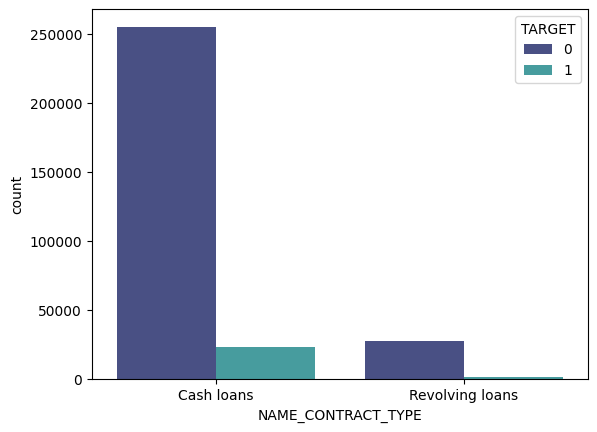

In [ ]:
sns.countplot(x=application['NAME_CONTRACT_TYPE'] ,data=application, hue='TARGET', palette='mako')

> ### Univariate and bivariate for CODE_GENDER

<Axes: xlabel='CODE_GENDER', ylabel='count'>

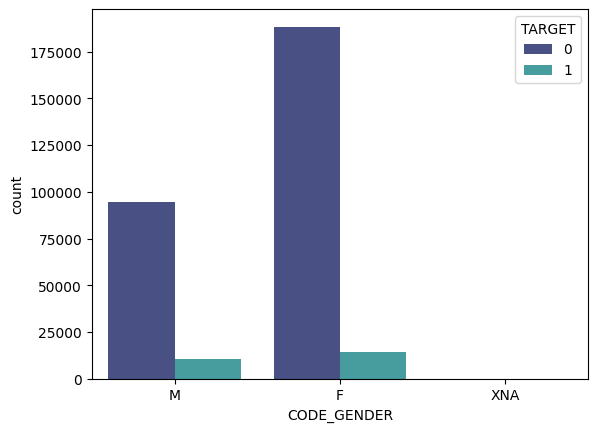

In [ ]:
sns.countplot(x=application['CODE_GENDER'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for FLAG_OWN_CAR

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

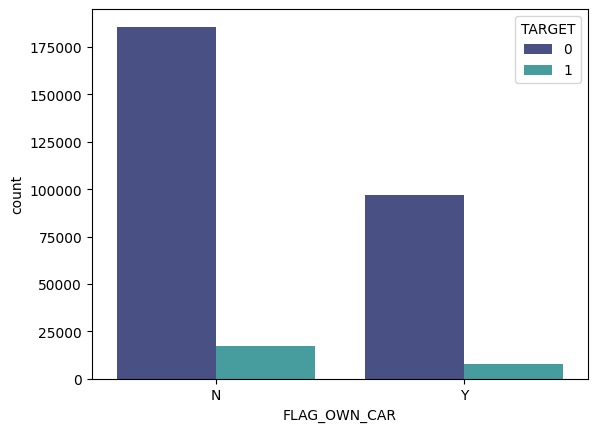

In [ ]:
sns.countplot(x=application['FLAG_OWN_CAR'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for FLAG_OWN_REALTY

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

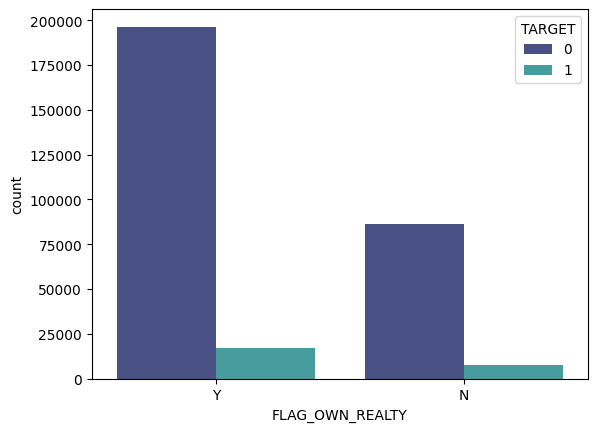

In [ ]:
sns.countplot(x=application['FLAG_OWN_REALTY'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for NAME_TYPE_SUITE

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

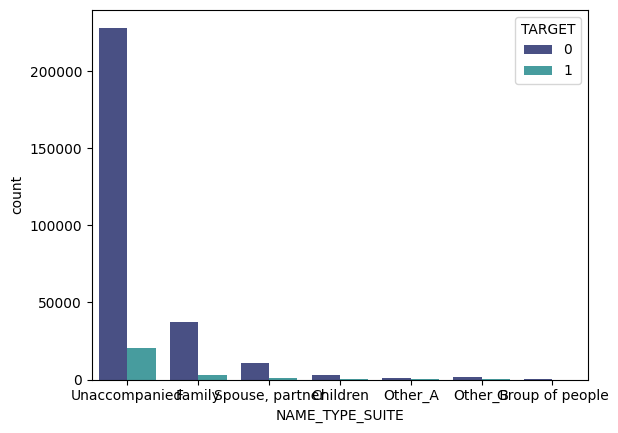

In [ ]:
sns.countplot(x=application['NAME_TYPE_SUITE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for NAME_INCOME_TYPE

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

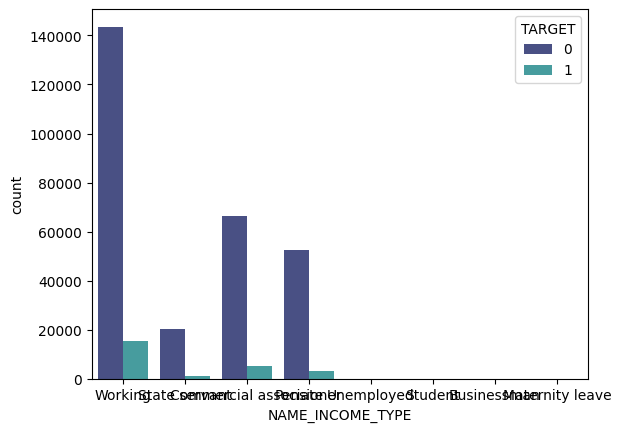

In [ ]:
sns.countplot(x=application['NAME_INCOME_TYPE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for NAME_EDUCATION_TYPE

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

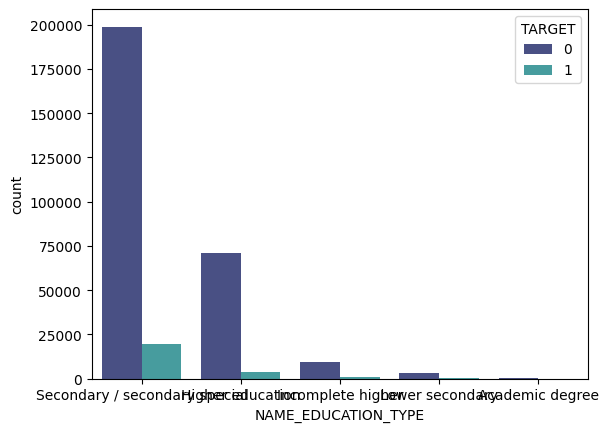

In [ ]:
sns.countplot(x=application['NAME_EDUCATION_TYPE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for NAME_FAMILY_STATUS

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

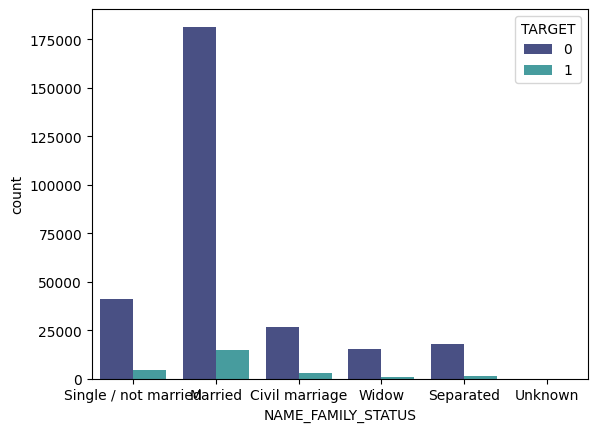

In [ ]:
sns.countplot(x=application['NAME_FAMILY_STATUS'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for NAME_HOUSING_TYPE

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

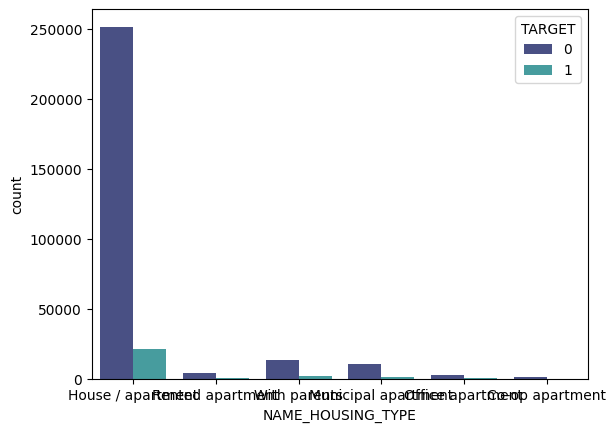

In [ ]:
sns.countplot(x=application['NAME_HOUSING_TYPE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for OCCUPATION_TYPE

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

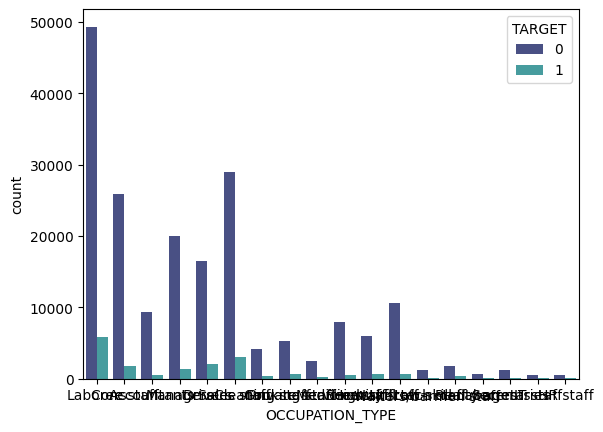

In [ ]:
sns.countplot(x=application['OCCUPATION_TYPE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for WEEKDAY_APPR_PROCESS_START

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

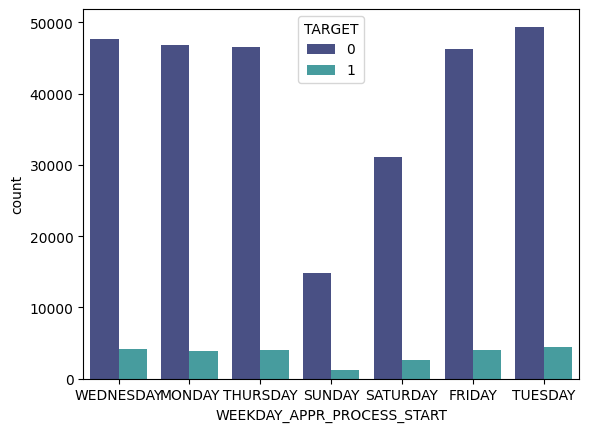

In [ ]:
sns.countplot(x=application['WEEKDAY_APPR_PROCESS_START'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for ORGANIZATION_TYPE

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='count'>

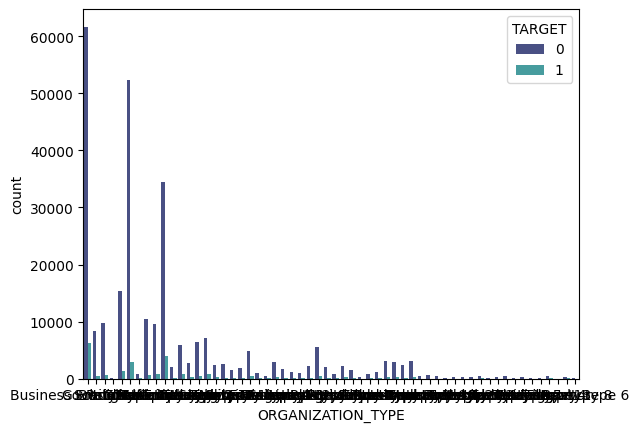

In [ ]:
sns.countplot(x=application['ORGANIZATION_TYPE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for FONDKAPREMONT_MODE

<Axes: xlabel='FONDKAPREMONT_MODE', ylabel='count'>

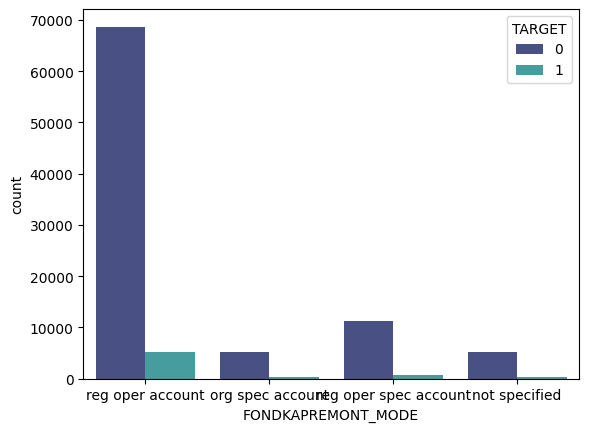

In [ ]:
sns.countplot(x=application['FONDKAPREMONT_MODE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for HOUSETYPE_MODE

<Axes: xlabel='HOUSETYPE_MODE', ylabel='count'>

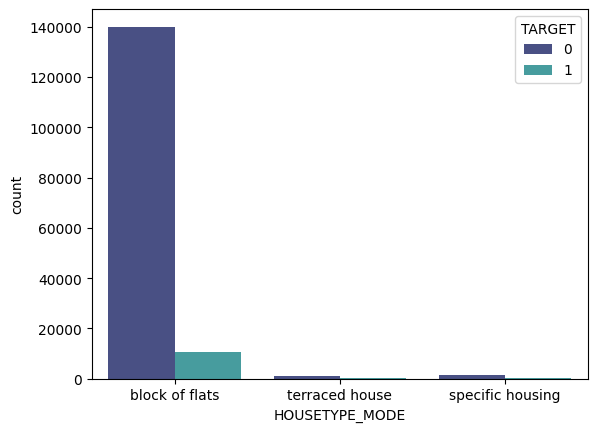

In [ ]:
sns.countplot(x=application['HOUSETYPE_MODE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for WALLSMATERIAL_MODE

<Axes: xlabel='WALLSMATERIAL_MODE', ylabel='count'>

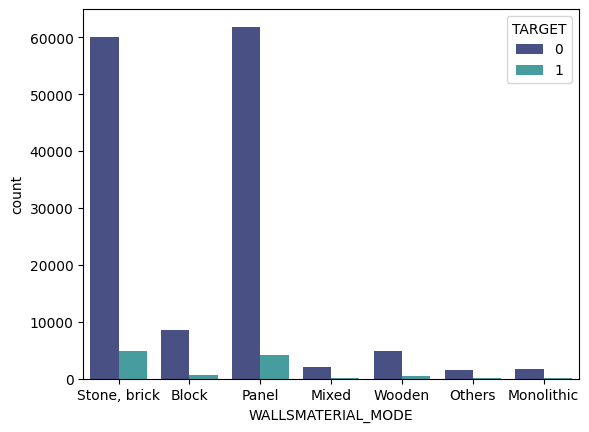

In [ ]:
sns.countplot(x=application['WALLSMATERIAL_MODE'] ,data=application, hue='TARGET', palette='mako')

### Univariate and bivariate for EMERGENCYSTATE_MODE

<Axes: xlabel='EMERGENCYSTATE_MODE', ylabel='count'>

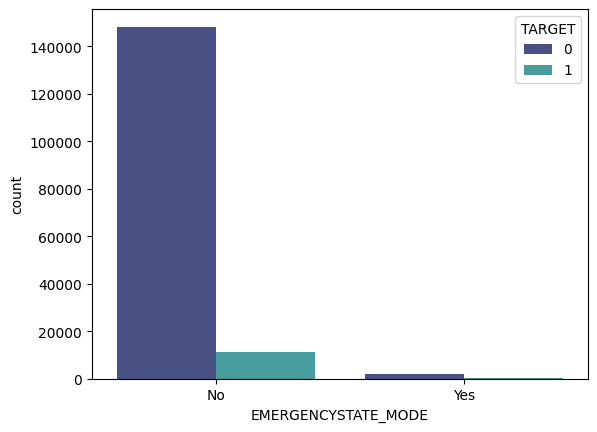

In [ ]:
sns.countplot(x=application['EMERGENCYSTATE_MODE'] ,data=application, hue='TARGET', palette='mako')

>> ### Boxplot

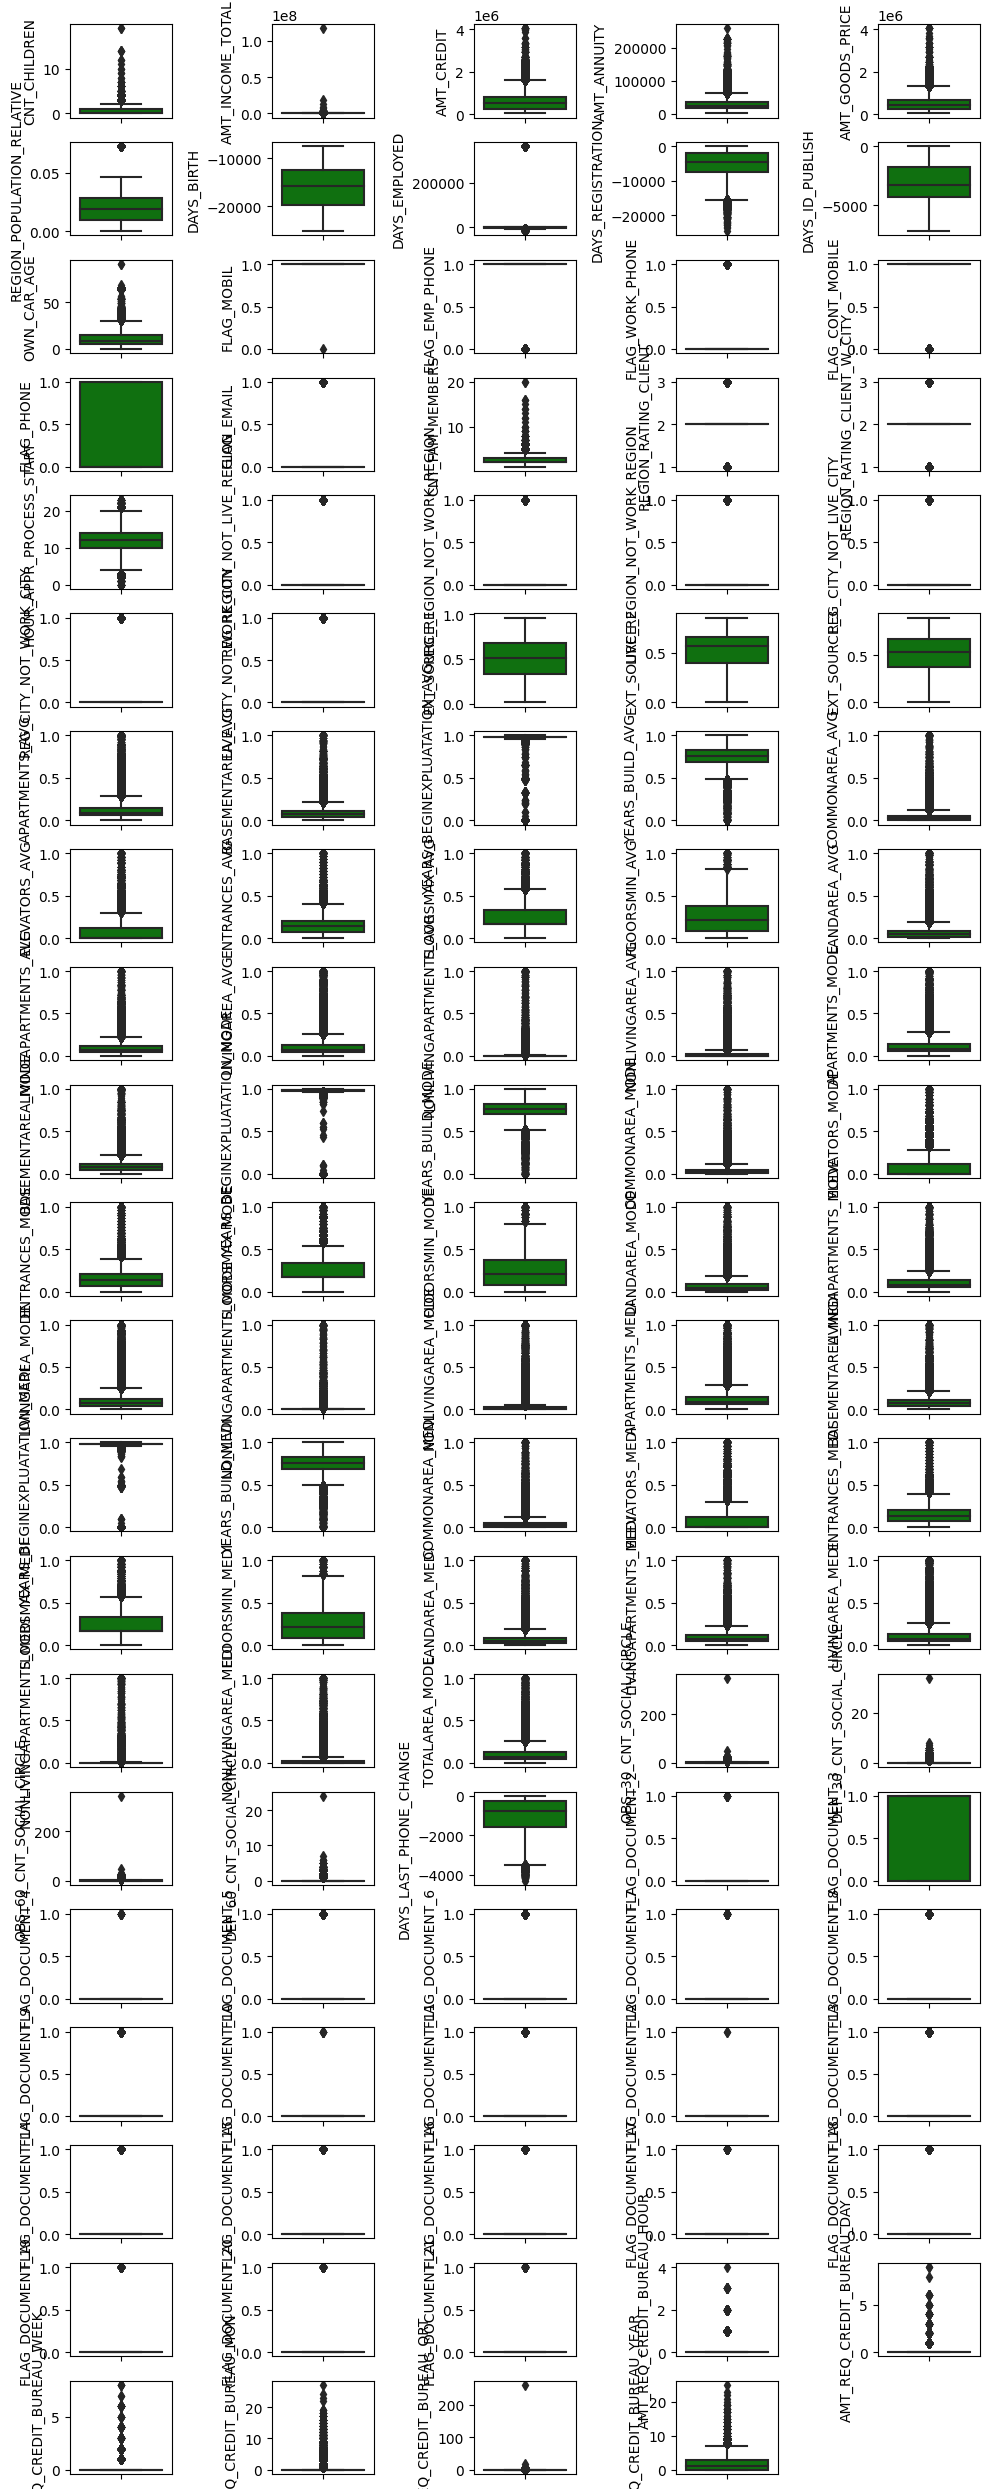

In [ ]:
plt.figure(figsize=(10,25))
for i in range(0, len(nums)):
    plt.subplot(21, 5, i+1)
    sns.boxplot(y=application[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Boxplot for own car age vs gender**

>> ### Histplot

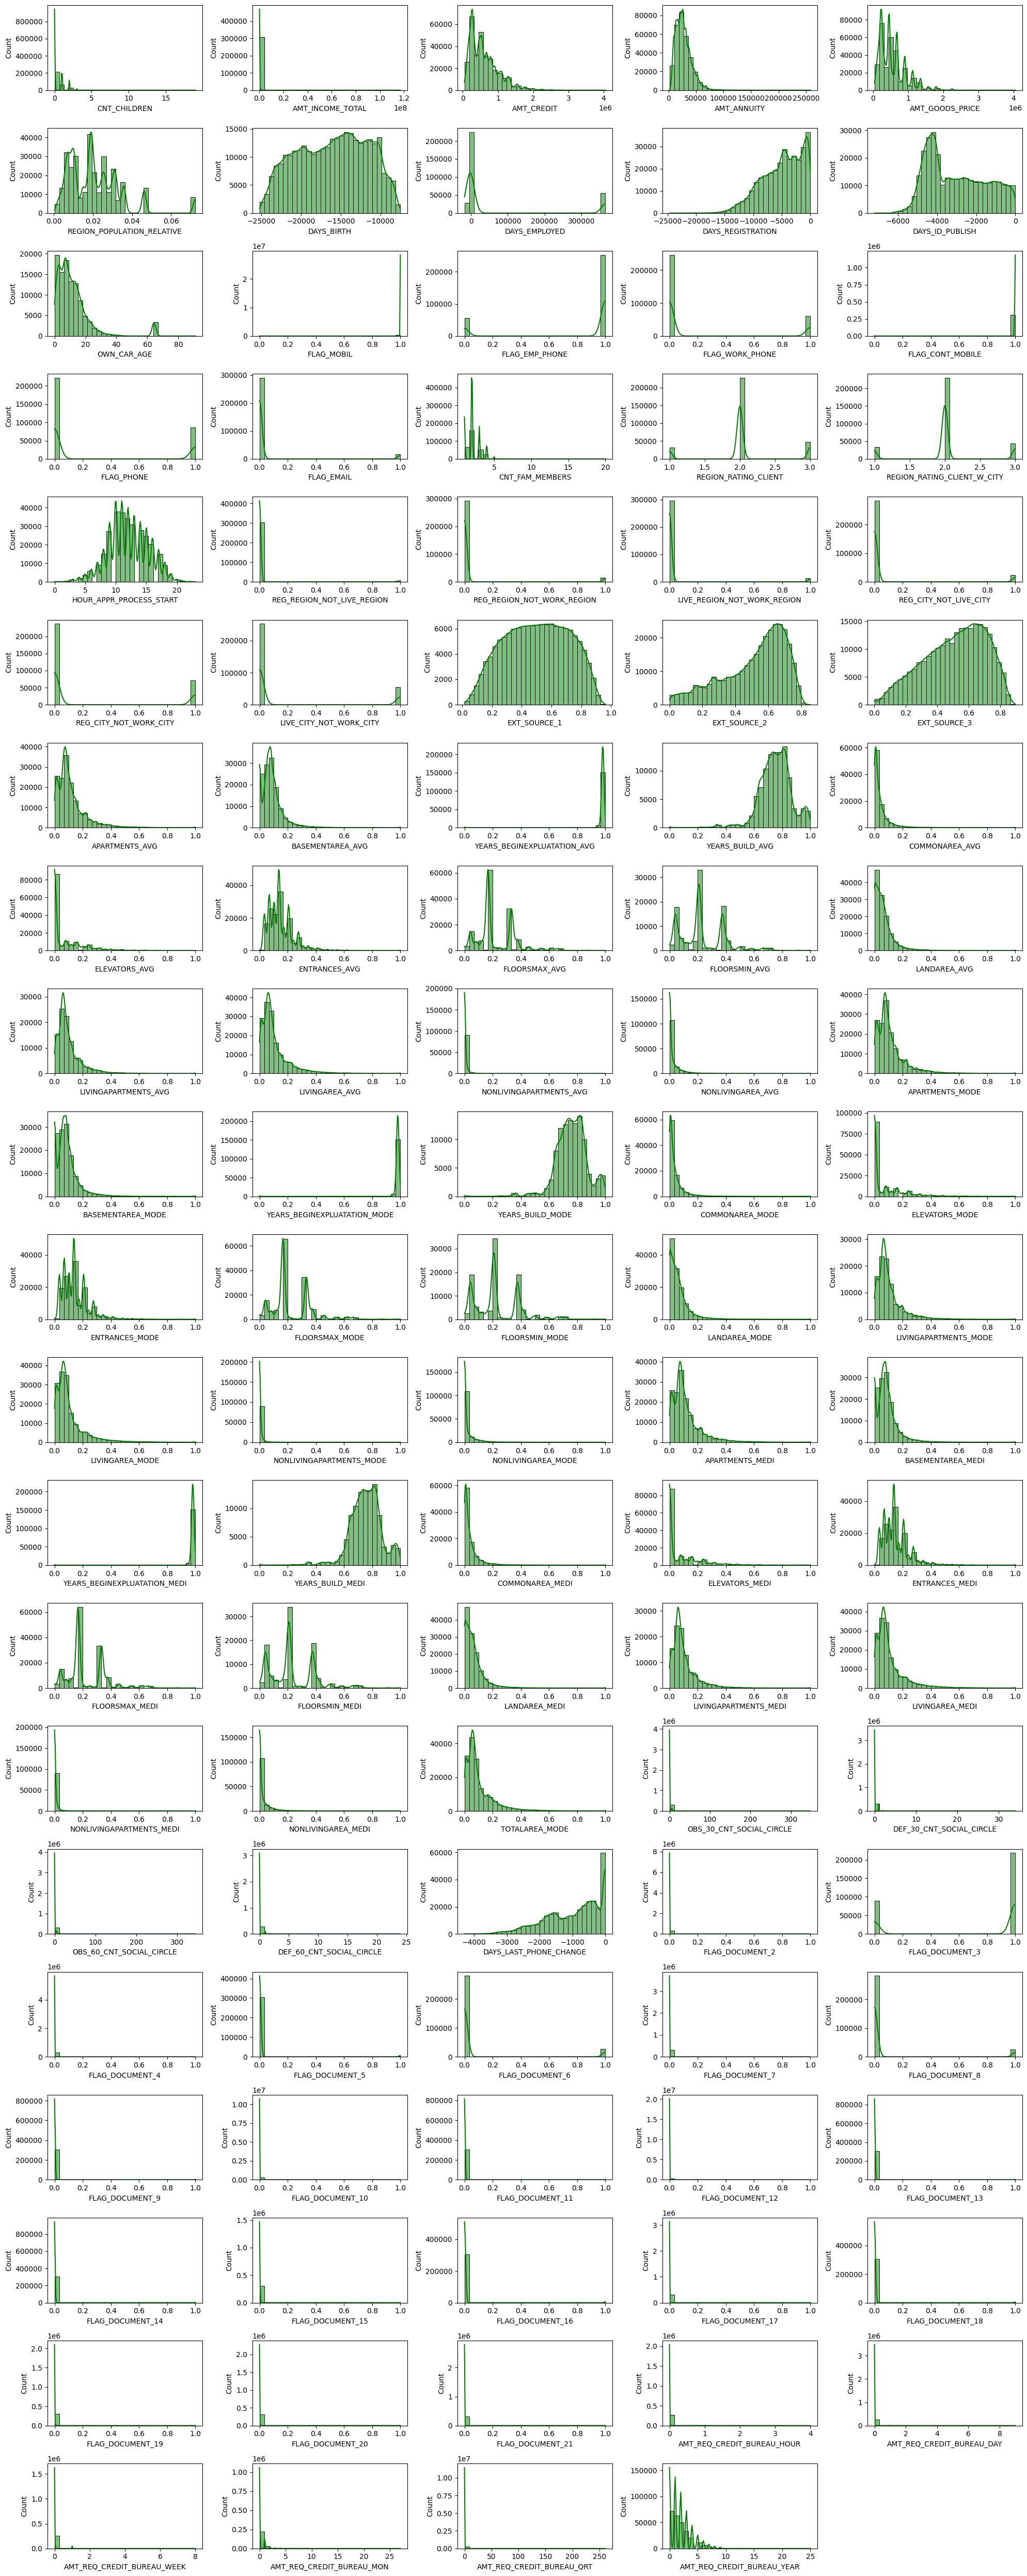

In [ ]:
plt.figure(figsize=(20, 50))
for i in range(0, len(nums)):
    plt.subplot(21, 5, i+1)
    sns.histplot(application[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

Berdasarkan hasil histogram di atas, dapat dilihat distribusi dari setiap kolom, yaitu:
1. SKD_ID_CURR -> Distribusi Merata
2. AM_ANNUITY-> Distribusi Skew Kanan
3. DAYS REGISTRATION -> Distribusi Skew Kiri
4. DAYS_ID_PUBLISH -> Secara keseluruhan, data berada di kanan, namun puncak distribusi berada di daerah tengah-tengah
5. AMT_GOODS_PRICE -> Distribusi data merupakan skew kanan, meskipun data tersebut naik turun
6. TARGET -> Distribusi tidak dapat diketahui karena hanya terdapat dua frekuensi, yaitu 0 dan 1, serta jumlah frekuensi 0 > jumlah frekuensi 1
7. CNT_CHILDREN -> distribusi skew kanan
8. REGION_POPULATION_RELATIVE -> Distribusi tidak dapat ditentukan apakah skew kanan atau kiri. hal tersebut dikarenakan setiap frekuensi memiliki nilai naik turun dan tidak ada kecenderungan daerah kanan atau kiri
9. OWN_CAR_AGE -> distribusi cenderung skew kanan, namun terdapat anomali data pada frekuensi sekitar 60-an dengan nilai 5000
10. FLAG_MOBIL -> distribusi tidak dapat ditentukan karena hanya terdapat 1 nilai frekuensi, yaitu frekuensi 1
11. DAYS_BIRTH -> distribusi cenderung merata
12. AMT_INCOME_TOTAL ->distribusi tidak dapat ditentukan karena hanya terdapat 1 nilai frekuensi, yaitu frekuensi 0
13. AMT_CREDIT -> Distribusi data merupakan skew kanan, meskipun data tersebut naik turun
14. DAYS_EMLPLOYED ->  Distribusi tidak dapat diketahui
15. FLAG_EMP_PHONE -> Distribusi tidak dapat diketahui karena hanya terdapat dua frekuensi, yaitu 0 dan 1, serta jumlah frekuensi 0 < jumlah frekuensi 1

>> ### Korelasi (Sebelum Pre-processing)

**Mencari Korelasi Setiap Varibel Pada Dataset Test**

In [ ]:
# Correlation between all feature and TARGET
application_corr = application.corr()['TARGET'].sort_values().reset_index()
application_corr

index    TARGET
0                    EXT_SOURCE_3 -0.178919
1                    EXT_SOURCE_2 -0.160472
2                    EXT_SOURCE_1 -0.155317
3                   DAYS_EMPLOYED -0.044932
4                   FLOORSMAX_AVG -0.044003
5                  FLOORSMAX_MEDI -0.043768
6                  FLOORSMAX_MODE -0.043226
7                 AMT_GOODS_PRICE -0.039645
8      REGION_POPULATION_RELATIVE -0.037227
9                   ELEVATORS_AVG -0.034199
10                 ELEVATORS_MEDI -0.033863
11                  FLOORSMIN_AVG -0.033614
12                 FLOORSMIN_MEDI -0.033394
13                 LIVINGAREA_AVG -0.032997
14                LIVINGAREA_MEDI -0.032739
15                 FLOORSMIN_MODE -0.032698
16                 TOTALAREA_MODE -0.032596
17                 ELEVATORS_MODE -0.032131
18                LIVINGAREA_MODE -0.030685
19                     AMT_CREDIT -0.030369
20                 APARTMENTS_AVG -0.029498
21                APARTMENTS_MEDI -0.029184
22                FLAG_DOCUMENT_6 -0.028602
23                APARTMENTS_MODE -0.027284
24           LIVINGAPARTMENTS_AVG -0.025031
25          LIVINGAPARTMENTS_MEDI -0.024621
26        HOUR_APPR_PROCESS_START -0.024166
27                     FLAG_PHONE -0.023806
28          LIVINGAPARTMENTS_MODE -0.023393
29               BASEMENTAREA_AVG -0.022746
30               YEARS_BUILD_MEDI -0.022326
31                YEARS_BUILD_AVG -0.022149
32              BASEMENTAREA_MEDI -0.022081
33               YEARS_BUILD_MODE -0.022068
34              BASEMENTAREA_MODE -0.019952
35                  ENTRANCES_AVG -0.019172
36                 ENTRANCES_MEDI -0.019025
37                COMMONAREA_MEDI -0.018573
38                 COMMONAREA_AVG -0.018550
39                 ENTRANCES_MODE -0.017387
40                COMMONAREA_MODE -0.016340
41              NONLIVINGAREA_AVG -0.013578
42             NONLIVINGAREA_MEDI -0.013337
43                    AMT_ANNUITY -0.012817
44             NONLIVINGAREA_MODE -0.012711
45      AMT_REQ_CREDIT_BUREAU_MON -0.012462
46               FLAG_DOCUMENT_16 -0.011615
47               FLAG_DOCUMENT_13 -0.011583
48                  LANDAREA_MEDI -0.011256
49                   LANDAREA_AVG -0.010885
50                  LANDAREA_MODE -0.010174
51   YEARS_BEGINEXPLUATATION_MEDI -0.009993
52    YEARS_BEGINEXPLUATATION_AVG -0.009728
53               FLAG_DOCUMENT_14 -0.009464
54   YEARS_BEGINEXPLUATATION_MODE -0.009036
55                FLAG_DOCUMENT_8 -0.008040
56               FLAG_DOCUMENT_18 -0.007952
57               FLAG_DOCUMENT_15 -0.006536
58                FLAG_DOCUMENT_9 -0.004352
59               FLAG_DOCUMENT_11 -0.004229
60               AMT_INCOME_TOTAL -0.003982
61               FLAG_DOCUMENT_17 -0.003378
62        NONLIVINGAPARTMENTS_AVG -0.003176
63       NONLIVINGAPARTMENTS_MEDI -0.002757
64                FLAG_DOCUMENT_4 -0.002672
65      AMT_REQ_CREDIT_BUREAU_QRT -0.002022
66                     FLAG_EMAIL -0.001758
67       NONLIVINGAPARTMENTS_MODE -0.001557
68                FLAG_DOCUMENT_7 -0.001520
69               FLAG_DOCUMENT_10 -0.001414
70               FLAG_DOCUMENT_19 -0.001358
71               FLAG_DOCUMENT_12 -0.000756
72                FLAG_DOCUMENT_5 -0.000316
73               FLAG_DOCUMENT_20  0.000215
74               FLAG_CONT_MOBILE  0.000370
75                     FLAG_MOBIL  0.000534
76     AMT_REQ_CREDIT_BUREAU_WEEK  0.000788
77     AMT_REQ_CREDIT_BUREAU_HOUR  0.000930
78      AMT_REQ_CREDIT_BUREAU_DAY  0.002704
79    LIVE_REGION_NOT_WORK_REGION  0.002819
80               FLAG_DOCUMENT_21  0.003709
81                FLAG_DOCUMENT_2  0.005417
82     REG_REGION_NOT_LIVE_REGION  0.005576
83     REG_REGION_NOT_WORK_REGION  0.006942
84       OBS_60_CNT_SOCIAL_CIRCLE  0.009022
85       OBS_30_CNT_SOCIAL_CIRCLE  0.009131
86                CNT_FAM_MEMBERS  0.009308
87                   CNT_CHILDREN  0.019187
88     AMT_REQ_CREDIT_BUREAU_YEAR  0.019930
89                FLAG_WORK_PHONE  0.028524
90       DEF_60_CNT_SOCI

Memilih korelasi dengan nilai korelasi positif

In [ ]:
corr_positive = application_corr[application_corr['TARGET'] > 0]
corr_positive

index    TARGET
73              FLAG_DOCUMENT_20  0.000215
74              FLAG_CONT_MOBILE  0.000370
75                    FLAG_MOBIL  0.000534
76    AMT_REQ_CREDIT_BUREAU_WEEK  0.000788
77    AMT_REQ_CREDIT_BUREAU_HOUR  0.000930
78     AMT_REQ_CREDIT_BUREAU_DAY  0.002704
79   LIVE_REGION_NOT_WORK_REGION  0.002819
80              FLAG_DOCUMENT_21  0.003709
81               FLAG_DOCUMENT_2  0.005417
82    REG_REGION_NOT_LIVE_REGION  0.005576
83    REG_REGION_NOT_WORK_REGION  0.006942
84      OBS_60_CNT_SOCIAL_CIRCLE  0.009022
85      OBS_30_CNT_SOCIAL_CIRCLE  0.009131
86               CNT_FAM_MEMBERS  0.009308
87                  CNT_CHILDREN  0.019187
88    AMT_REQ_CREDIT_BUREAU_YEAR  0.019930
89               FLAG_WORK_PHONE  0.028524
90      DEF_60_CNT_SOCIAL_CIRCLE  0.031276
91      DEF_30_CNT_SOCIAL_CIRCLE  0.032248
92       LIVE_CITY_NOT_WORK_CITY  0.032518
93                   OWN_CAR_AGE  0.037612
94             DAYS_REGISTRATION  0.041975
95               FLAG_DOCUMENT_3  0.044346
96        REG_CITY_NOT_LIVE_CITY  0.044395
97                FLAG_EMP_PHONE  0.045982
98        REG_CITY_NOT_WORK_CITY  0.050994
99               DAYS_ID_PUBLISH  0.051457
100       DAYS_LAST_PHONE_CHANGE  0.055218
101         REGION_RATING_CLIENT  0.058899
102  REGION_RATING_CLIENT_W_CITY  0.060893
103                   DAYS_BIRTH  0.078239
104                       TARGET  1.000000

## Multivariate Analysis

Korelasi selurh variabel numerik

In [ ]:
application_corr_multivariate = application.select_dtypes(include='number').corr()
application_corr_multivariate

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                        1.000000      0.019187         -0.003982   
CNT_CHILDREN                  0.019187      1.000000          0.012882   
AMT_INCOME_TOTAL             -0.003982      0.012882          1.000000   
AMT_CREDIT                   -0.030369      0.002145          0.156870   
AMT_ANNUITY                  -0.012817      0.021374          0.191657   
AMT_GOODS_PRICE              -0.039645     -0.001827          0.159610   
REGION_POPULATION_RELATIVE   -0.037227     -0.025573          0.074796   
DAYS_BIRTH                    0.078239      0.330938          0.027261   
DAYS_EMPLOYED                -0.044932     -0.239818         -0.064223   
DAYS_REGISTRATION             0.041975      0.183395          0.027805   
DAYS_ID_PUBLISH               0.051457     -0.028019          0.008506   
OWN_CAR_AGE                   0.037612      0.008494         -0.117273   
FLAG_MOBIL                    0.000534      0.001041          0.000325   
FLAG_EMP_PHONE                0.045982      0.240714          0.063994   
FLAG_WORK_PHONE               0.028524      0.055630         -0.017193   
FLAG_CONT_MOBILE              0.000370     -0.000794         -0.008290   
FLAG_PHONE                   -0.023806     -0.029906          0.000159   
FLAG_EMAIL                   -0.001758      0.022619          0.038378   
CNT_FAM_MEMBERS               0.009308      0.879161          0.016342   
REGION_RATING_CLIENT          0.058899      0.025423         -0.085465   
REGION_RATING_CLIENT_W_CITY   0.060893      0.024781         -0.091735   
HOUR_APPR_PROCESS_START      -0.024166     -0.007292          0.036459   
REG_REGION_NOT_LIVE_REGION    0.005576     -0.013319          0.031191   
REG_REGION_NOT_WORK_REGION    0.006942      0.008185          0.062340   
LIVE_REGION_NOT_WORK_REGION   0.002819      0.014835          0.058059   
REG_CITY_NOT_LIVE_CITY        0.044395      0.020072          0.003574   
REG_CITY_NOT_WORK_CITY        0.050994      0.070650          0.006431   
LIVE_CITY_NOT_WORK_CITY       0.032518      0.069957          0.008285   
EXT_SOURCE_1                 -0.155317     -0.138470          0.026232   
EXT_SOURCE_2                 -0.160472     -0.018015          0.060925   
EXT_SOURCE_3                 -0.178919     -0.042710         -0.030229   
APARTMENTS_AVG               -0.029498     -0.013222          0.034501   
BASEMENTAREA_AVG             -0.022746     -0.008464          0.017303   
YEARS_BEGINEXPLUATATION_AVG  -0.009728      0.006902          0.005658   
YEARS_BUILD_AVG              -0.022149      0.030172          0.042334   
COMMONAREA_AVG               -0.018550      0.000140          0.089616   
ELEVATORS_AVG                -0.034199     -0.007060          0.045053   
ENTRANCES_AVG                -0.019172     -0.008341          0.005394   
FLOORSMAX_AVG                -0.044003     -0.009705          0.060171   
FLOORSMIN_AVG                -0.033614     -0.008753          0.139860   
LANDAREA_AVG                 -0.010885     -0.003121         -0.001598   
LIVINGAPARTMENTS_AVG         -0.025031     -0.008648          0.106920   
LIVINGAREA_AVG               -0.032997     -0.010116          0.039976   
NONLIVINGAPARTMENTS_AVG      -0.003176      0.004051          0.029520   
NONLIVINGAREA_AVG            -0.013578      0.000028          0.074604   
APARTMENTS_MODE              -0.027284     -0.012105          0.029994   
BASEMENTAREA_MODE            -0.019952     -0.008513          0.012821   
YEARS_BEGINEXPLUATATION_MODE -0.009036      0.006199          0.005284   
YEARS_BUILD_MODE             -0.022068      0.029549          0.037299   
COMMONAREA_MODE              -0.016340      0.000440          0.075625   
ELEVATORS_MODE               -0.032131     -0.006397          0.041032   
ENTRANCES_MODE               -0.017387     -0.006880          0.002027   
FLOORSMAX_MODE               -0.043226     -0.009550          0.057675   
FLOORSMIN_MODE               -0.0326

Korelasi seluruh variabel numerik yang bernilai positif

In [ ]:
multi_corr_positive = application_corr_multivariate[application_corr_multivariate > 0]
multi_corr_positive

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                        1.000000      0.019187               NaN   
CNT_CHILDREN                  0.019187      1.000000          0.012882   
AMT_INCOME_TOTAL                   NaN      0.012882          1.000000   
AMT_CREDIT                         NaN      0.002145          0.156870   
AMT_ANNUITY                        NaN      0.021374          0.191657   
AMT_GOODS_PRICE                    NaN           NaN          0.159610   
REGION_POPULATION_RELATIVE         NaN           NaN          0.074796   
DAYS_BIRTH                    0.078239      0.330938          0.027261   
DAYS_EMPLOYED                      NaN           NaN               NaN   
DAYS_REGISTRATION             0.041975      0.183395          0.027805   
DAYS_ID_PUBLISH               0.051457           NaN          0.008506   
OWN_CAR_AGE                   0.037612      0.008494               NaN   
FLAG_MOBIL                    0.000534      0.001041          0.000325   
FLAG_EMP_PHONE                0.045982      0.240714          0.063994   
FLAG_WORK_PHONE               0.028524      0.055630               NaN   
FLAG_CONT_MOBILE              0.000370           NaN               NaN   
FLAG_PHONE                         NaN           NaN          0.000159   
FLAG_EMAIL                         NaN      0.022619          0.038378   
CNT_FAM_MEMBERS               0.009308      0.879161          0.016342   
REGION_RATING_CLIENT          0.058899      0.025423               NaN   
REGION_RATING_CLIENT_W_CITY   0.060893      0.024781               NaN   
HOUR_APPR_PROCESS_START            NaN           NaN          0.036459   
REG_REGION_NOT_LIVE_REGION    0.005576           NaN          0.031191   
REG_REGION_NOT_WORK_REGION    0.006942      0.008185          0.062340   
LIVE_REGION_NOT_WORK_REGION   0.002819      0.014835          0.058059   
REG_CITY_NOT_LIVE_CITY        0.044395      0.020072          0.003574   
REG_CITY_NOT_WORK_CITY        0.050994      0.070650          0.006431   
LIVE_CITY_NOT_WORK_CITY       0.032518      0.069957          0.008285   
EXT_SOURCE_1                       NaN           NaN          0.026232   
EXT_SOURCE_2                       NaN           NaN          0.060925   
EXT_SOURCE_3                       NaN           NaN               NaN   
APARTMENTS_AVG                     NaN           NaN          0.034501   
BASEMENTAREA_AVG                   NaN           NaN          0.017303   
YEARS_BEGINEXPLUATATION_AVG        NaN      0.006902          0.005658   
YEARS_BUILD_AVG                    NaN      0.030172          0.042334   
COMMONAREA_AVG                     NaN      0.000140          0.089616   
ELEVATORS_AVG                      NaN           NaN          0.045053   
ENTRANCES_AVG                      NaN           NaN          0.005394   
FLOORSMAX_AVG                      NaN           NaN          0.060171   
FLOORSMIN_AVG                      NaN           NaN          0.139860   
LANDAREA_AVG                       NaN           NaN               NaN   
LIVINGAPARTMENTS_AVG               NaN           NaN          0.106920   
LIVINGAREA_AVG                     NaN           NaN          0.039976   
NONLIVINGAPARTMENTS_AVG            NaN      0.004051          0.029520   
NONLIVINGAREA_AVG                  NaN      0.000028          0.074604   
APARTMENTS_MODE                    NaN           NaN          0.029994   
BASEMENTAREA_MODE                  NaN           NaN          0.012821   
YEARS_BEGINEXPLUATATION_MODE       NaN      0.006199          0.005284   
YEARS_BUILD_MODE                   NaN      0.029549          0.037299   
COMMONAREA_MODE                    NaN      0.000440          0.075625   
ELEVATORS_MODE                     NaN           NaN          0.041032   
ENTRANCES_MODE                     NaN           NaN          0.002027   
FLOORSMAX_MODE                     NaN           NaN          0.057675   
FLOORSMIN_MODE                     N

# Data Preparation

> ## Replace XNA dengan Nan

In [ ]:
#Karena pada beberapa kolom data categorical terdapat 1 kategori yaitu XNA yang tidak memiliki arti atau memiliki arti yang sama dengan NAN namun terbaca sebagai kategori
application.loc[application['ORGANIZATION_TYPE'] == 'XNA'].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      10678.5   
23               Y             0         83250.000    239850.0      23850.0   
38               Y             0         99000.000    247275.0      17338.5   
43               Y             0        108000.000    746280.0      42970.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8          913500.0        Children        Pensioner   
11         135000.0        Children        Pensioner   
23         225000.0   Unaccompanied        Pensioner   
38         225000.0   Unaccompanied        Pensioner   
43         675000.0   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634      -20099         365243            -7427.0   
11                    0.015221      -20417         365243            -5246.0   
23                    0.006296      -24827         365243            -9012.0   
38                    0.006207      -23920         365243            -9817.0   
43                    0.010966      -23548         365243            -5745.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8             -3514          NaN           1               0                0   
11            -2512          NaN           1               0                0   
23            -3684          NaN           1               0                0   
38            -4969          NaN           1               0                0   
43            -4576          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0             NaN              2.0   
11                 1           1           0             NaN              2.0   
23                 1           1           0             NaN              2.0   
38                 1           1           0             NaN              2.0   
43                 1           0           0             NaN              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
38                     2                            2   
43                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
38                     FRIDAY                       11   
43                  WEDNESDAY                        9   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0 

In [ ]:
application.loc[application['CODE_GENDER'] == 'XNA'].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35657            -10024.0            -3537         13.0           1   
38566             -2241.0            -4659          NaN           1   
83382              -183.0            -1671          NaN           1   
189640            -4099.0            -2326          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35657                1                1                 1           1   
38566                1                1                 1           1   
83382                1                1                 1           1   
189640               1                1                 1           1   

        FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657            0                 NaN              2.0                     3   
38566            0  Low-skill Laborers              4.0                     2   
83382            0          Core staff              3.0                     2   
189640           0                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CI

In [ ]:
application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(['XNA'], np.nan)

In [ ]:
application['CODE_GENDER'] = application['CODE_GENDER'].replace(['XNA'], np.nan)

> ## Data Duplicate Checking

In [ ]:
#Duplicated Values Checking
application.duplicated().sum()

0

> ## Missing Value Checking & Handling

In [ ]:
# Identification missing value in dataset
info = pd.DataFrame(application.dtypes, columns=['Dtypes'])
info['Unique'] = application.nunique().values
info['NA'] = application.isna().sum().values

# Pandas show all column
pd.set_option('display.max_row',200)

info

Dtypes  Unique      NA
SK_ID_CURR                      int64  307511       0
TARGET                          int64       2       0
NAME_CONTRACT_TYPE             object       2       0
CODE_GENDER                    object       2       4
FLAG_OWN_CAR                   object       2       0
FLAG_OWN_REALTY                object       2       0
CNT_CHILDREN                    int64      15       0
AMT_INCOME_TOTAL              float64    2548       0
AMT_CREDIT                    float64    5603       0
AMT_ANNUITY                   float64   13672      12
AMT_GOODS_PRICE               float64    1002     278
NAME_TYPE_SUITE                object       7    1292
NAME_INCOME_TYPE               object       8       0
NAME_EDUCATION_TYPE            object       5       0
NAME_FAMILY_STATUS             object       6       0
NAME_HOUSING_TYPE              object       6       0
REGION_POPULATION_RELATIVE    float64      81       0
DAYS_BIRTH                      int64   17460       0
DAYS_EMPLOYED                   int64   12574       0
DAYS_REGISTRATION             float64   15688       0
DAYS_ID_PUBLISH                 int64    6168       0
OWN_CAR_AGE                   float64      62  202929
FLAG_MOBIL                      int64       2       0
FLAG_EMP_PHONE                  int64       2       0
FLAG_WORK_PHONE                 int64       2       0
FLAG_CONT_MOBILE                int64       2       0
FLAG_PHONE                      int64       2       0
FLAG_EMAIL                      int64       2       0
OCCUPATION_TYPE                object      18   96391
CNT_FAM_MEMBERS               float64      17       2
REGION_RATING_CLIENT            int64       3       0
REGION_RATING_CLIENT_W_CITY     int64       3       0
WEEKDAY_APPR_PROCESS_START     object       7       0
HOUR_APPR_PROCESS_START         int64      24       0
REG_REGION_NOT_LIVE_REGION      int64       2       0
REG_REGION_NOT_WORK_REGION      int64       2       0
LIVE_REGION_NOT_WORK_REGION     int64       2       0
REG_CITY_NOT_LIVE_CITY          int64       2       0
REG_CITY_NOT_WORK_CITY          int64       2       0
LIVE_CITY_NOT_WORK_CITY         int64       2       0
ORGANIZATION_TYPE              object      57   55374
EXT_SOURCE_1                  float64  114584  173378
EXT_SOURCE_2                  float64  119831     660
EXT_SOURCE_3                  float64     814   60965
APARTMENTS_AVG                float64    2339  156061
BASEMENTAREA_AVG              float64    3780  179943
YEARS_BEGINEXPLUATATION_AVG   float64     285  150007
YEARS_BUILD_AVG               float64     149  204488
COMMONAREA_AVG                float64    3181  214865
ELEVATORS_AVG                 float64     257  163891
ENTRANCES_AVG                 float64     285  154828
FLOORSMAX_AVG                 float64     403  153020
FLOORSMIN_AVG                 float64     305  208642
LANDAREA_AVG                  float64    3527  182590
LIVINGAPARTMENTS_AVG          float64    1868  210199
LIVINGAREA_AVG                float64    5199  154350
NONLIVINGAPARTMENTS_AVG       float64     386  213514
NONLIVINGAREA_AVG             float64    3290  169682
APARTMENTS_MODE               float64     760  156061
BASEMENTAREA_MODE             float64    3841  179943
YEARS_BEGINEXPLUATATION_MODE  float64     221  150007
YEARS_BUILD_MODE              float64     154  204488
COMMONAREA_MODE               float64    3128  214865
ELEVATORS_MODE                float64      26  163891
ENTRANCES_MODE                float64      30  154828
FLOORSMAX_MODE                float64      25  153020
FLOORSMIN_MODE                float64      25  208642
LANDAREA_MODE                 float64    3563  182590
LIVINGAPARTMENTS_MODE         float64     736  210199
LIVINGAREA_MODE               float64    5301  154350
NONLIVINGAPARTMENTS_MODE      float64     167  213514
NONLIVINGAREA_MODE            float64    3327  169682
APARTMENTS_MEDI               float64    1148  156061
BASEMENTAREA_MEDI             float

In [ ]:
#Check missing value
missing_value= pd.DataFrame(application.isnull().sum(), columns=['Total Null Values'])
missing_value['Percentage'] = (missing_value['Total Null Values']/application.shape[0])*100
missing_value.sort_values(by=['Percentage'], ascending=False).reset_index()

index  Total Null Values  Percentage
0                  COMMONAREA_AVG             214865   69.872297
1                 COMMONAREA_MODE             214865   69.872297
2                 COMMONAREA_MEDI             214865   69.872297
3         NONLIVINGAPARTMENTS_AVG             213514   69.432963
4        NONLIVINGAPARTMENTS_MODE             213514   69.432963
5        NONLIVINGAPARTMENTS_MEDI             213514   69.432963
6              FONDKAPREMONT_MODE             210295   68.386172
7           LIVINGAPARTMENTS_MEDI             210199   68.354953
8            LIVINGAPARTMENTS_AVG             210199   68.354953
9           LIVINGAPARTMENTS_MODE             210199   68.354953
10                  FLOORSMIN_AVG             208642   67.848630
11                 FLOORSMIN_MODE             208642   67.848630
12                 FLOORSMIN_MEDI             208642   67.848630
13                YEARS_BUILD_AVG             204488   66.497784
14               YEARS_BUILD_MEDI             204488   66.497784
15               YEARS_BUILD_MODE             204488   66.497784
16                    OWN_CAR_AGE             202929   65.990810
17                  LANDAREA_MEDI             182590   59.376738
18                   LANDAREA_AVG             182590   59.376738
19                  LANDAREA_MODE             182590   59.376738
20               BASEMENTAREA_AVG             179943   58.515956
21              BASEMENTAREA_MODE             179943   58.515956
22              BASEMENTAREA_MEDI             179943   58.515956
23                   EXT_SOURCE_1             173378   56.381073
24              NONLIVINGAREA_AVG             169682   55.179164
25             NONLIVINGAREA_MEDI             169682   55.179164
26             NONLIVINGAREA_MODE             169682   55.179164
27                  ELEVATORS_AVG             163891   53.295980
28                 ELEVATORS_MODE             163891   53.295980
29                 ELEVATORS_MEDI             163891   53.295980
30             WALLSMATERIAL_MODE             156341   50.840783
31                APARTMENTS_MEDI             156061   50.749729
32                APARTMENTS_MODE             156061   50.749729
33                 APARTMENTS_AVG             156061   50.749729
34                  ENTRANCES_AVG             154828   50.348768
35                 ENTRANCES_MODE             154828   50.348768
36                 ENTRANCES_MEDI             154828   50.348768
37                LIVINGAREA_MEDI             154350   50.193326
38                 LIVINGAREA_AVG             154350   50.193326
39                LIVINGAREA_MODE             154350   50.193326
40                 HOUSETYPE_MODE             154297   50.176091
41                  FLOORSMAX_AVG             153020   49.760822
42                 FLOORSMAX_MODE             153020   49.760822
43                 FLOORSMAX_MEDI             153020   49.760822
44    YEARS_BEGINEXPLUATATION_AVG             150007   48.781019
45   YEARS_BEGINEXPLUATATION_MEDI             150007   48.781019
46   YEARS_BEGINEXPLUATATION_MODE             150007   48.781019
47                 TOTALAREA_MODE             148431   48.268517
48            EMERGENCYSTATE_MODE             145755   47.398304
49                OCCUPATION_TYPE              96391   31.345545
50                   EXT_SOURCE_3              60965   19.825307
51              ORGANIZATION_TYPE              55374   18.007161
52     AMT_REQ_CREDIT_BUREAU_WEEK              41519   13.501631
53      AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
54      AMT_REQ_CREDIT_BUREAU_MON              41519   13.501631
55      AMT_REQ_CREDIT_BUREAU_QRT              41519   13.501631
56     AMT_REQ_CREDIT_BUREAU_HOUR              41519   13.501631
57     AMT_REQ_CREDIT_BUREAU_YEAR              41519   13.501631
58                NAME_TYPE_SUITE               1292    0.420148
59       DEF_30_CNT_SOCIAL_CIRCLE               1021    0.332021
60       OBS_60_CNT_SOCIAL_CIRCLE               1021    0.33202

In [ ]:
#Missing Values pada dataset
data_missing_value = application.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(application))*100,6)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0                 COMMONAREA_AVG         214865   69.872297
1                COMMONAREA_MODE         214865   69.872297
2                COMMONAREA_MEDI         214865   69.872297
3        NONLIVINGAPARTMENTS_AVG         213514   69.432963
4       NONLIVINGAPARTMENTS_MODE         213514   69.432963
5       NONLIVINGAPARTMENTS_MEDI         213514   69.432963
6             FONDKAPREMONT_MODE         210295   68.386172
7          LIVINGAPARTMENTS_MEDI         210199   68.354953
8           LIVINGAPARTMENTS_AVG         210199   68.354953
9          LIVINGAPARTMENTS_MODE         210199   68.354953
10                 FLOORSMIN_AVG         208642   67.848630
11                FLOORSMIN_MODE         208642   67.848630
12                FLOORSMIN_MEDI         208642   67.848630
13               YEARS_BUILD_AVG         204488   66.497784
14              YEARS_BUILD_MEDI         204488   66.497784
15              YEARS_BUILD_MODE         204488   66.497784
16                   OWN_CAR_AGE         202929   65.990810
17                 LANDAREA_MEDI         182590   59.376738
18                  LANDAREA_AVG         182590   59.376738
19                 LANDAREA_MODE         182590   59.376738
20              BASEMENTAREA_AVG         179943   58.515956
21             BASEMENTAREA_MODE         179943   58.515956
22             BASEMENTAREA_MEDI         179943   58.515956
23                  EXT_SOURCE_1         173378   56.381073
24             NONLIVINGAREA_AVG         169682   55.179164
25            NONLIVINGAREA_MEDI         169682   55.179164
26            NONLIVINGAREA_MODE         169682   55.179164
27                 ELEVATORS_AVG         163891   53.295980
28                ELEVATORS_MODE         163891   53.295980
29                ELEVATORS_MEDI         163891   53.295980
30            WALLSMATERIAL_MODE         156341   50.840783
31               APARTMENTS_MEDI         156061   50.749729
32               APARTMENTS_MODE         156061   50.749729
33                APARTMENTS_AVG         156061   50.749729
34                 ENTRANCES_AVG         154828   50.348768
35                ENTRANCES_MODE         154828   50.348768
36                ENTRANCES_MEDI         154828   50.348768
37               LIVINGAREA_MEDI         154350   50.193326
38                LIVINGAREA_AVG         154350   50.193326
39               LIVINGAREA_MODE         154350   50.193326
40                HOUSETYPE_MODE         154297   50.176091
41                 FLOORSMAX_AVG         153020   49.760822
42                FLOORSMAX_MODE         153020   49.760822
43                FLOORSMAX_MEDI         153020   49.760822
44   YEARS_BEGINEXPLUATATION_AVG         150007   48.781019
45  YEARS_BEGINEXPLUATATION_MEDI         150007   48.781019
46  YEARS_BEGINEXPLUATATION_MODE         150007   48.781019
47                TOTALAREA_MODE         148431   48.268517
48           EMERGENCYSTATE_MODE         145755   47.398304
49               OCCUPATION_TYPE          96391   31.345545
50                  EXT_SOURCE_3          60965   19.825307
51             ORGANIZATION_TYPE          55374   18.007161
52    AMT_REQ_CREDIT_BUREAU_WEEK          41519   13.501631
53     AMT_REQ_CREDIT_BUREAU_DAY          41519   13.501631
54     AMT_REQ_CREDIT_BUREAU_MON          41519   13.501631
55     AMT_REQ_CREDIT_BUREAU_QRT          41519   13.501631
56    AMT_REQ_CREDIT_BUREAU_HOUR          41519   13.501631
57    AMT_REQ_CREDIT_BUREAU_YEAR          41519   13.501631
58               NAME_TYPE_SUITE           1292    0.420148
59      DEF_30_CNT_SOCIAL_CIRCLE           1021    0.332021
60      OBS_60_CNT_SOCIAL_CIRCLE           1021    0.332021
61      OBS_30_CNT_SOCIAL_CIRCLE           1021    0.332021
62      DEF_60_CNT_SOCIAL_CIRCLE           1021    0.332021
63                  EXT_SOURCE_2            660    0.214626
64               AMT_GOODS_PRICE            278    0.090403
65                   AMT_ANNUITY             12    0.003902
66   

Drop Feature that has missing value more than 50%

In [ ]:
# Below code gives percentage of null in every column
na_percentage = (application.isna().sum()/application.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>50].keys()
print(col_to_drop)

application = application.drop(col_to_drop, axis=1)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [ ]:
# Recheck Total Row and Column
application.shape

(307511, 81)

In [ ]:
#Missing Values pada dataset
data_missing_value = application.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(application))*100,6)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0                  FLOORSMAX_AVG         153020   49.760822
1                 FLOORSMAX_MODE         153020   49.760822
2                 FLOORSMAX_MEDI         153020   49.760822
3    YEARS_BEGINEXPLUATATION_AVG         150007   48.781019
4   YEARS_BEGINEXPLUATATION_MODE         150007   48.781019
5   YEARS_BEGINEXPLUATATION_MEDI         150007   48.781019
6                 TOTALAREA_MODE         148431   48.268517
7            EMERGENCYSTATE_MODE         145755   47.398304
8                OCCUPATION_TYPE          96391   31.345545
9                   EXT_SOURCE_3          60965   19.825307
10             ORGANIZATION_TYPE          55374   18.007161
11    AMT_REQ_CREDIT_BUREAU_YEAR          41519   13.501631
12    AMT_REQ_CREDIT_BUREAU_HOUR          41519   13.501631
13     AMT_REQ_CREDIT_BUREAU_DAY          41519   13.501631
14    AMT_REQ_CREDIT_BUREAU_WEEK          41519   13.501631
15     AMT_REQ_CREDIT_BUREAU_MON          41519   13.501631
16     AMT_REQ_CREDIT_BUREAU_QRT          41519   13.501631
17               NAME_TYPE_SUITE           1292    0.420148
18      OBS_30_CNT_SOCIAL_CIRCLE           1021    0.332021
19      DEF_30_CNT_SOCIAL_CIRCLE           1021    0.332021
20      OBS_60_CNT_SOCIAL_CIRCLE           1021    0.332021
21      DEF_60_CNT_SOCIAL_CIRCLE           1021    0.332021
22                  EXT_SOURCE_2            660    0.214626
23               AMT_GOODS_PRICE            278    0.090403
24                   AMT_ANNUITY             12    0.003902
25                   CODE_GENDER              4    0.001301
26               CNT_FAM_MEMBERS              2    0.000650
27        DAYS_LAST_PHONE_CHANGE              1    0.000325

Handling Missing Value for Data type = object

In [ ]:
application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].fillna(value = 'Unk')
application['NAME_TYPE_SUITE'] = application['NAME_TYPE_SUITE'].fillna(value = 'Unk')

application['EMERGENCYSTATE_MODE'] = application['EMERGENCYSTATE_MODE'].fillna(value = 'Unk')
application['NAME_EDUCATION_TYPE'] = application['NAME_EDUCATION_TYPE'].fillna(value = 'Unk')
application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].fillna(value = 'Unk')
application['NAME_HOUSING_TYPE'] = application['NAME_HOUSING_TYPE'].fillna(value = 'Unk')
application['WEEKDAY_APPR_PROCESS_START'] = application['WEEKDAY_APPR_PROCESS_START'].fillna(value = 'Unk')
application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].fillna(value = 'Unk')

Handling Missing Value for Data type = non-object (Numerik)

In [ ]:
na_columns_nums = [i for i in application.columns if application[i].isna().sum() > 0 and application[i].dtype != 'object']
na_columns_nums_length = len(na_columns_nums)
na_columns_nums_length

23

In [ ]:
application[na_columns_nums] = application[na_columns_nums].fillna(application[na_columns_nums].median())

In [ ]:
# Identification missing value in dataset
info = pd.DataFrame(application.dtypes, columns=['Dtypes'])
info['Unique'] = application.nunique().values
info['NA'] = application.isna().sum().values

# Pandas show all column
pd.set_option('display.max_row',200)

info

Dtypes  Unique  NA
SK_ID_CURR                      int64  307511   0
TARGET                          int64       2   0
NAME_CONTRACT_TYPE             object       2   0
CODE_GENDER                    object       2   4
FLAG_OWN_CAR                   object       2   0
FLAG_OWN_REALTY                object       2   0
CNT_CHILDREN                    int64      15   0
AMT_INCOME_TOTAL              float64    2548   0
AMT_CREDIT                    float64    5603   0
AMT_ANNUITY                   float64   13672   0
AMT_GOODS_PRICE               float64    1002   0
NAME_TYPE_SUITE                object       8   0
NAME_INCOME_TYPE               object       8   0
NAME_EDUCATION_TYPE            object       5   0
NAME_FAMILY_STATUS             object       6   0
NAME_HOUSING_TYPE              object       6   0
REGION_POPULATION_RELATIVE    float64      81   0
DAYS_BIRTH                      int64   17460   0
DAYS_EMPLOYED                   int64   12574   0
DAYS_REGISTRATION             float64   15688   0
DAYS_ID_PUBLISH                 int64    6168   0
FLAG_MOBIL                      int64       2   0
FLAG_EMP_PHONE                  int64       2   0
FLAG_WORK_PHONE                 int64       2   0
FLAG_CONT_MOBILE                int64       2   0
FLAG_PHONE                      int64       2   0
FLAG_EMAIL                      int64       2   0
OCCUPATION_TYPE                object      19   0
CNT_FAM_MEMBERS               float64      17   0
REGION_RATING_CLIENT            int64       3   0
REGION_RATING_CLIENT_W_CITY     int64       3   0
WEEKDAY_APPR_PROCESS_START     object       7   0
HOUR_APPR_PROCESS_START         int64      24   0
REG_REGION_NOT_LIVE_REGION      int64       2   0
REG_REGION_NOT_WORK_REGION      int64       2   0
LIVE_REGION_NOT_WORK_REGION     int64       2   0
REG_CITY_NOT_LIVE_CITY          int64       2   0
REG_CITY_NOT_WORK_CITY          int64       2   0
LIVE_CITY_NOT_WORK_CITY         int64       2   0
ORGANIZATION_TYPE              object      58   0
EXT_SOURCE_2                  float64  119831   0
EXT_SOURCE_3                  float64     814   0
YEARS_BEGINEXPLUATATION_AVG   float64     285   0
FLOORSMAX_AVG                 float64     403   0
YEARS_BEGINEXPLUATATION_MODE  float64     221   0
FLOORSMAX_MODE                float64      25   0
YEARS_BEGINEXPLUATATION_MEDI  float64     245   0
FLOORSMAX_MEDI                float64      49   0
TOTALAREA_MODE                float64    5116   0
EMERGENCYSTATE_MODE            object       3   0
OBS_30_CNT_SOCIAL_CIRCLE      float64      33   0
DEF_30_CNT_SOCIAL_CIRCLE      float64      10   0
OBS_60_CNT_SOCIAL_CIRCLE      float64      33   0
DEF_60_CNT_SOCIAL_CIRCLE      float64       9   0
DAYS_LAST_PHONE_CHANGE        float64    3773   0
FLAG_DOCUMENT_2                 int64       2   0
FLAG_DOCUMENT_3                 int64       2   0
FLAG_DOCUMENT_4                 int64       2   0
FLAG_DOCUMENT_5                 int64       2   0
FLAG_DOCUMENT_6                 int64       2   0
FLAG_DOCUMENT_7                 int64       2   0
FLAG_DOCUMENT_8                 int64       2   0
FLAG_DOCUMENT_9                 int64       2   0
FLAG_DOCUMENT_10                int64       2   0
FLAG_DOCUMENT_11                int64       2   0
FLAG_DOCUMENT_12                int64       2   0
FLAG_DOCUMENT_13                int64       2   0
FLAG_DOCUMENT_14                int64       2   0
FLAG_DOCUMENT_15                int64       2   0
FLAG_DOCUMENT_16                int64       2   0
FLAG_DOCUMENT_17                int64       2   0
FLAG_DOCUMENT_18                int64       2   0
FLAG_DOCUMENT_19                int64       2   0
FLAG_DOCUMENT_20                int64       2   0
FLAG_DOCUMENT_21                int64       2   0
AMT_REQ_CREDIT_BUREAU_HOUR    float64       5   0
AMT_REQ_CREDIT_BUREAU_DAY     float64       9   0
AMT_REQ_CREDIT_BUREAU_WEEK    float64       9   0
AMT_REQ_CREDIT_BUREAU_MON     float64      24   0
AMT_REQ_CREDIT_BUREAU_QRT     f

> ## Anomalies Checking & Handling

In [ ]:
application['DAYS_BIRTH'] = application['DAYS_BIRTH'].values/-365
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED'].values/-365
application['DAYS_REGISTRATION'] = application['DAYS_REGISTRATION'].values/-365
application['DAYS_ID_PUBLISH'] = application['DAYS_ID_PUBLISH'].values/-365
application['DAYS_LAST_PHONE_CHANGE'] = application['DAYS_LAST_PHONE_CHANGE'].values/-365

In [ ]:
application.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'}, inplace=True)

In [ ]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0                    0.018801  25.920548        1.745205            9.994521   
1                    0.003541  45.931507        3.254795            3.249315   
2                    0.010032  52.180822        0.616438           11.671233   
3                    0.008019  52.068493        8.326027           26.939726   
4                    0.028663  54.608219        8.323288           11.810959   

   YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          5.808219           1               1                0   
1          0.797260           1               1                0   
2          6.934247           1               1                1   
3          6.676712           1               1                0   
4          9.473973           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0 

In [ ]:
application.shape

(307511, 81)

# Encoding

In [ ]:
cats = [i for i in application.columns if application[i].dtype == 'object']

In [ ]:
cats_info = pd.DataFrame(application[cats].dtypes, columns=['Dtypes'])
cats_info['Unique'] = application[cats].nunique().values

pd.set_option('display.max_row',200)

cats_info

Dtypes  Unique
NAME_CONTRACT_TYPE          object       2
CODE_GENDER                 object       2
FLAG_OWN_CAR                object       2
FLAG_OWN_REALTY             object       2
NAME_TYPE_SUITE             object       8
NAME_INCOME_TYPE            object       8
NAME_EDUCATION_TYPE         object       5
NAME_FAMILY_STATUS          object       6
NAME_HOUSING_TYPE           object       6
OCCUPATION_TYPE             object      19
WEEKDAY_APPR_PROCESS_START  object       7
ORGANIZATION_TYPE           object      58
EMERGENCYSTATE_MODE         object       3

## Replace Some Value

In [ ]:
application['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Unk', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [ ]:
application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(['XNA'], 'Other')
application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace('Unk', 'Other')

In [ ]:
business_type = ['Business Entity Type 1', 'Business Entity Type 2','Business Entity Type 3']
replacement_1 = 'Business Type'

application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(business_type, replacement_1)

In [ ]:
industry = ['Industry: type 1', 'Industry: type 2','Industry: type 3','Industry: type 4',
                 'Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8','Industry: type 9',
                 'Industry: type 10','Industry: type 11','Industry: type 12','Industry: type 13']
replacement_2 = 'Industry'

application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(industry, replacement_2)

In [ ]:
transport = ['Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4']
replacement_3 = 'Transport'

application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(transport, replacement_3)

In [ ]:
trade = ['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4',
         'Trade: type 5','Trade: type 6','Trade: type 7']
replacement_4 = 'Trade'

application['ORGANIZATION_TYPE'] = application['ORGANIZATION_TYPE'].replace(trade, replacement_4)

In [ ]:
application['ORGANIZATION_TYPE'].unique()

array(['Business Type', 'School', 'Government', 'Religion', 'Other',
       'Electricity', 'Medicine', 'Self-employed', 'Transport',
       'Construction', 'Housing', 'Kindergarten', 'Trade', 'Industry',
       'Military', 'Services', 'Security Ministries', 'Emergency',
       'Security', 'University', 'Police', 'Postal', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Bank', 'Insurance', 'Mobile',
       'Legal Services', 'Advertising', 'Cleaning', 'Telecom', 'Realtor'],
      dtype=object)

> ## Label Encoding

In [ ]:
# Grouping data
label = [i for i in application[cats].columns if application[i].nunique() == 2]
label_len = len(label)
label_len

4

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance LabelEncoder
encoder = LabelEncoder()

# Melakukan label encoding pada setiap kolom
for column in application[label].columns:
    application[column] = encoder.fit_transform(application[column])

# Menampilkan dataframe yang telah diencode
application.head()



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0                    0.018801  25.920548        1.745205            9.994521   
1                    0.003541  45.931507        3.254795            3.249315   
2                    0.010032  52.180822        0.616438           11.671233   
3                    0.008019  52.068493        8.326027           26.939726   
4                    0.028663  54.608219        8.323288           11.810959   

   YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          5.808219           1               1                0   
1          0.797260           1               1                0   
2          6.934247           1               1                1   
3          6.676712           1               1                0   
4          9.473973           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3     

> ## One Hot Encoding

In [ ]:
# Grouping data
one_hot = [i for i in application[cats].columns if application[i].nunique() != 2]
one_hot_len = len(one_hot)
one_hot_len

10

In [ ]:
# One Hot Encoding
dummies_application = pd.get_dummies(application[one_hot])
dummies_application.head()

CODE_GENDER  NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  \
0            1                         0                       0   
1            0                         0                       1   
2            1                         0                       0   
3            0                         0                       0   
4            1                         0                       0   

   NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spouse, partner  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_Unk  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              1                    0   

   NAME_INCOME_TYPE_Businessman  NAME_INCOME_TYPE_Commercial associate  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   NAME_INCOME_TYPE_Maternity leave  NAME_INCOME_TYPE_Pensioner  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  \
0                               0                         0   
1                               1                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   NAME_INCOME_TYPE_Unemployed  NAME_INCOME_TYPE_Working  \
0                            0                         1   
1                            0                         0   
2                            0                         1   
3                            0                         1   
4                            0                         1   

   NAME_EDUCATION_TYPE_Academic degree  NAME_EDUCATION_TYPE_Higher education  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                  

In [ ]:
application_2 = pd.concat([application, dummies_application], axis=1)
application_2.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0                    0.018801  25.920548        1.745205            9.994521   
1                    0.003541  45.931507        3.254795            3.249315   
2                    0.010032  52.180822        0.616438           11.671233   
3                    0.008019  52.068493        8.326027           26.939726   
4                    0.028663  54.608219        8.323288           11.810959   

   YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          5.808219           1               1                0   
1          0.797260           1               1                0   
2          6.934247           1               1                1   
3          6.676712           1               1                0   
4          9.473973           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3     

In [ ]:
application_2.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
NAME_CONTRACT_TYPE                                     int64
CODE_GENDER                                            int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
AMT_ANNUITY                                          float64
AMT_GOODS_PRICE                                      float64
NAME_TYPE_SUITE                                       object
NAME_INCOME_TYPE                                      object
NAME_EDUCATION_TYPE                                   object
NAME_FAMILY_STATUS                                    object
NAME_HOUSING_TYPE                                     object
REGION_POPULATION_RELATI

## Correlation

In [ ]:
application_2.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0                    0.018801  25.920548        1.745205            9.994521   
1                    0.003541  45.931507        3.254795            3.249315   
2                    0.010032  52.180822        0.616438           11.671233   
3                    0.008019  52.068493        8.326027           26.939726   
4                    0.028663  54.608219        8.323288           11.810959   

   YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          5.808219           1               1                0   
1          0.797260           1               1                0   
2          6.934247           1               1                1   
3          6.676712           1               1                0   
4          9.473973           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3     

In [ ]:
application_2.dtypes=='object'

SK_ID_CURR                                           False
TARGET                                               False
NAME_CONTRACT_TYPE                                   False
CODE_GENDER                                          False
FLAG_OWN_CAR                                         False
FLAG_OWN_REALTY                                      False
CNT_CHILDREN                                         False
AMT_INCOME_TOTAL                                     False
AMT_CREDIT                                           False
AMT_ANNUITY                                          False
AMT_GOODS_PRICE                                      False
NAME_TYPE_SUITE                                       True
NAME_INCOME_TYPE                                      True
NAME_EDUCATION_TYPE                                   True
NAME_FAMILY_STATUS                                    True
NAME_HOUSING_TYPE                                     True
REGION_POPULATION_RELATIVE                           Fal

In [ ]:
application_3 = application.drop(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE','NAME_EDUCATION_TYPE'], axis=1)
application_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  int64  
 3   CODE_GENDER                   307511 non-null  int64  
 4   FLAG_OWN_CAR                  307511 non-null  int64  
 5   FLAG_OWN_REALTY               307511 non-null  int64  
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  REGION_POPULATION_RELATIVE    307511 non-null  float64
 12  AGE                           307511 non-nul

In [ ]:
# Correlation between all feature and TARGET
application_corr = application_3.corr()['TARGET'].sort_values().reset_index()
application_corr

index    TARGET
0                   EXT_SOURCE_2 -0.160295
1                   EXT_SOURCE_3 -0.155892
2                            AGE -0.078239
3        YEARS_LAST_PHONE_CHANGE -0.055218
4               YEARS_ID_PUBLISH -0.051457
5             YEARS_REGISTRATION -0.041975
6                AMT_GOODS_PRICE -0.039623
7                  FLOORSMAX_AVG -0.039385
8                 FLOORSMAX_MEDI -0.039157
9                 FLOORSMAX_MODE -0.038377
10    REGION_POPULATION_RELATIVE -0.037227
11            NAME_CONTRACT_TYPE -0.030896
12                    AMT_CREDIT -0.030369
13                TOTALAREA_MODE -0.030214
14               FLAG_DOCUMENT_6 -0.028602
15       HOUR_APPR_PROCESS_START -0.024166
16                    FLAG_PHONE -0.023806
17                  FLAG_OWN_CAR -0.021851
18     AMT_REQ_CREDIT_BUREAU_MON -0.014794
19                   AMT_ANNUITY -0.012815
20              FLAG_DOCUMENT_16 -0.011615
21              FLAG_DOCUMENT_13 -0.011583
22              FLAG_DOCUMENT_14 -0.009464
23               FLAG_DOCUMENT_8 -0.008040
24              FLAG_DOCUMENT_18 -0.007952
25              FLAG_DOCUMENT_15 -0.006536
26               FLAG_OWN_REALTY -0.006148
27     AMT_REQ_CREDIT_BUREAU_QRT -0.005833
28  YEARS_BEGINEXPLUATATION_MEDI -0.004872
29   YEARS_BEGINEXPLUATATION_AVG -0.004665
30               FLAG_DOCUMENT_9 -0.004352
31              FLAG_DOCUMENT_11 -0.004229
32  YEARS_BEGINEXPLUATATION_MODE -0.004061
33              AMT_INCOME_TOTAL -0.003982
34              FLAG_DOCUMENT_17 -0.003378
35               FLAG_DOCUMENT_4 -0.002672
36                    SK_ID_CURR -0.002108
37                    FLAG_EMAIL -0.001758
38               FLAG_DOCUMENT_7 -0.001520
39              FLAG_DOCUMENT_10 -0.001414
40              FLAG_DOCUMENT_19 -0.001358
41    AMT_REQ_CREDIT_BUREAU_WEEK -0.001306
42              FLAG_DOCUMENT_12 -0.000756
43               FLAG_DOCUMENT_5 -0.000316
44    AMT_REQ_CREDIT_BUREAU_HOUR -0.000074
45              FLAG_DOCUMENT_20  0.000215
46              FLAG_CONT_MOBILE  0.000370
47                    FLAG_MOBIL  0.000534
48     AMT_REQ_CREDIT_BUREAU_DAY  0.001701
49   LIVE_REGION_NOT_WORK_REGION  0.002819
50              FLAG_DOCUMENT_21  0.003709
51               FLAG_DOCUMENT_2  0.005417
52    REG_REGION_NOT_LIVE_REGION  0.005576
53    REG_REGION_NOT_WORK_REGION  0.006942
54               CNT_FAM_MEMBERS  0.009308
55      OBS_60_CNT_SOCIAL_CIRCLE  0.009337
56      OBS_30_CNT_SOCIAL_CIRCLE  0.009447
57    AMT_REQ_CREDIT_BUREAU_YEAR  0.012161
58                  CNT_CHILDREN  0.019187
59               FLAG_WORK_PHONE  0.028524
60      DEF_60_CNT_SOCIAL_CIRCLE  0.031401
61      DEF_30_CNT_SOCIAL_CIRCLE  0.032394
62       LIVE_CITY_NOT_WORK_CITY  0.032518
63               FLAG_DOCUMENT_3  0.044346
64        REG_CITY_NOT_LIVE_CITY  0.044395
65                YEARS_EMPLOYED  0.044932
66                FLAG_EMP_PHONE  0.045982
67        REG_CITY_NOT_WORK_CITY  0.050994
68                   CODE_GENDER  0.054692
69          REGION_RATING_CLIENT  0.058899
70   REGION_RATING_CLIENT_W_CITY  0.060893
71                        TARGET  1.000000

In [ ]:
# Find correlation with the target and sort
correlations = application_3.corr()['TARGET'].sort_values().reset_index()


# Display correlations
print('Most Postive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Postive Correlations:
                           index    TARGET
57   AMT_REQ_CREDIT_BUREAU_YEAR  0.012161
58                 CNT_CHILDREN  0.019187
59              FLAG_WORK_PHONE  0.028524
60     DEF_60_CNT_SOCIAL_CIRCLE  0.031401
61     DEF_30_CNT_SOCIAL_CIRCLE  0.032394
62      LIVE_CITY_NOT_WORK_CITY  0.032518
63              FLAG_DOCUMENT_3  0.044346
64       REG_CITY_NOT_LIVE_CITY  0.044395
65               YEARS_EMPLOYED  0.044932
66               FLAG_EMP_PHONE  0.045982
67       REG_CITY_NOT_WORK_CITY  0.050994
68                  CODE_GENDER  0.054692
69         REGION_RATING_CLIENT  0.058899
70  REGION_RATING_CLIENT_W_CITY  0.060893
71                       TARGET  1.000000

Most Negative Correlations:
                          index    TARGET
0                 EXT_SOURCE_2 -0.160295
1                 EXT_SOURCE_3 -0.155892
2                          AGE -0.078239
3      YEARS_LAST_PHONE_CHANGE -0.055218
4             YEARS_ID_PUBLISH -0.051457
5           YEARS_REGIST

# Checking & Handling Outlier

In [ ]:
feat = application_corr.loc[44:70].reset_index()
feat = feat['index'].unique()
feat_len = len(feat)
feat_len

27

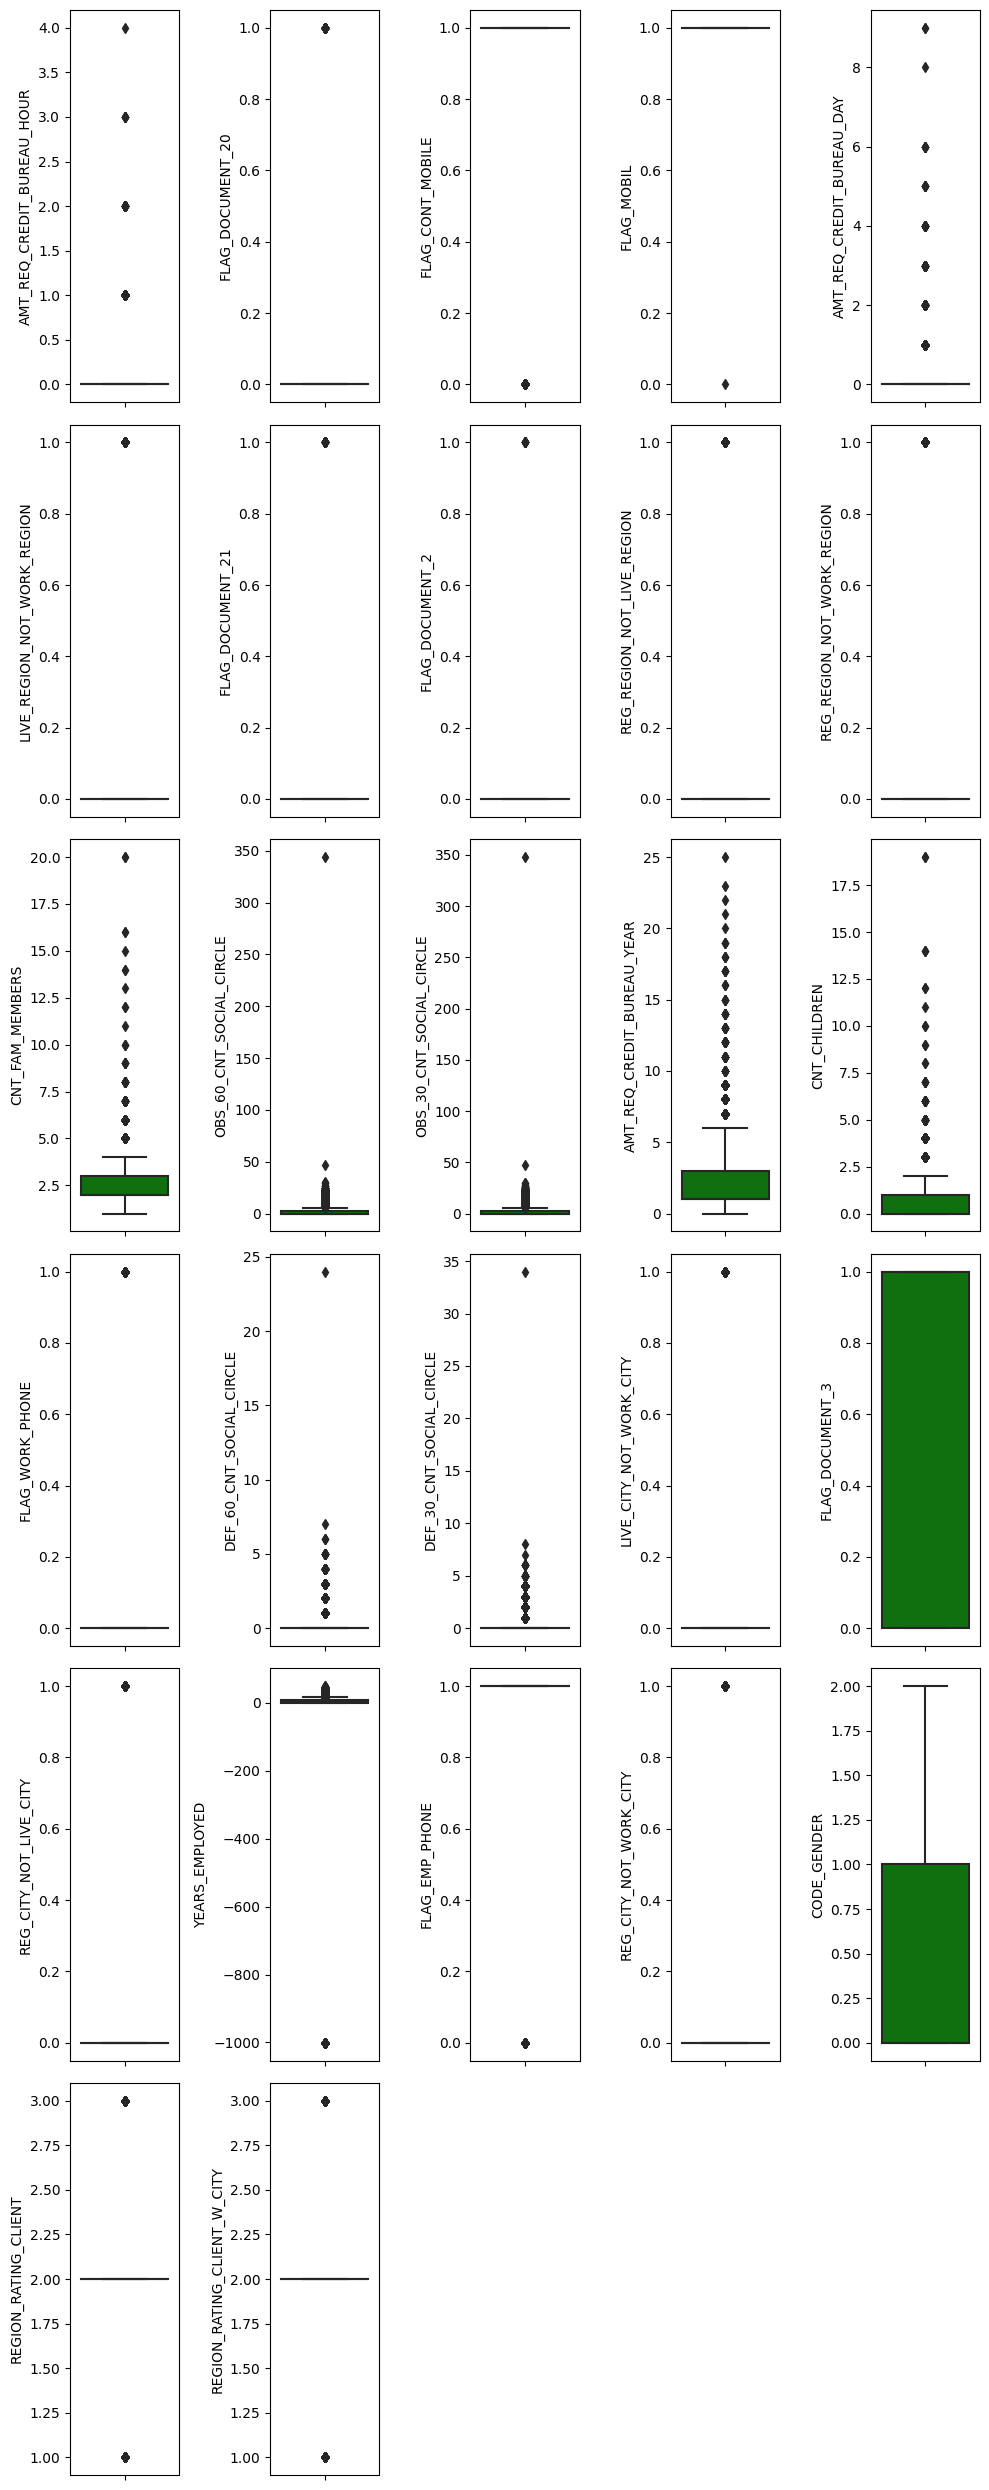

In [ ]:
plt.figure(figsize=(10,25))
for i in range(0, len(feat)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=application_3[feat[i]], color='green', orient='v')
    plt.tight_layout()

In [ ]:
# AMT_REQ_CREDIT_BUREAU_YEAR
Q1 = application_3['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.25)
Q3 = application_3['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.75)

IQR = Q3-Q1 #Interquartile range
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR

application_4 = application_3.loc[(application_3['AMT_REQ_CREDIT_BUREAU_YEAR'] >= fence_low) & (application_3['AMT_REQ_CREDIT_BUREAU_YEAR'] <= fence_high)]
application_4.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  \
0         351000.0                    0.018801  25.920548        1.745205   
1        1129500.0                    0.003541  45.931507        3.254795   
2         135000.0                    0.010032  52.180822        0.616438   
3         297000.0                    0.008019  52.068493        8.326027   
4         513000.0                    0.028663  54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2           11.671233          6.934247           1               1   
3           26.939726          6.676712           1               1   
4           11.810959          9.473973           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.262949   
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   

   EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.139376                       0.972

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

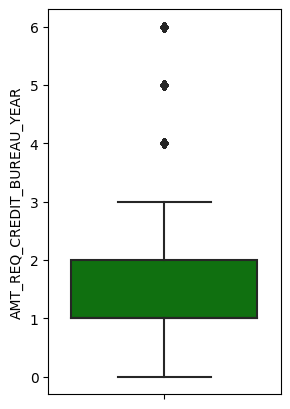

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(y=application_4['AMT_REQ_CREDIT_BUREAU_YEAR'], color='green', orient='v')

In [ ]:
# CNT_CHILDREN
Q1 = application_3['CNT_CHILDREN'].quantile(0.25)
Q3 = application_3['CNT_CHILDREN'].quantile(0.75)

IQR = Q3-Q1 #Interquartile range
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR

application_4 = application_3.loc[(application_3['CNT_CHILDREN'] >= fence_low) & (application_3['CNT_CHILDREN'] <= fence_high)]
application_4.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  \
0         351000.0                    0.018801  25.920548        1.745205   
1        1129500.0                    0.003541  45.931507        3.254795   
2         135000.0                    0.010032  52.180822        0.616438   
3         297000.0                    0.008019  52.068493        8.326027   
4         513000.0                    0.028663  54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2           11.671233          6.934247           1               1   
3           26.939726          6.676712           1               1   
4           11.810959          9.473973           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.262949   
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   

   EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.139376                       0.972

<Axes: ylabel='CNT_CHILDREN'>

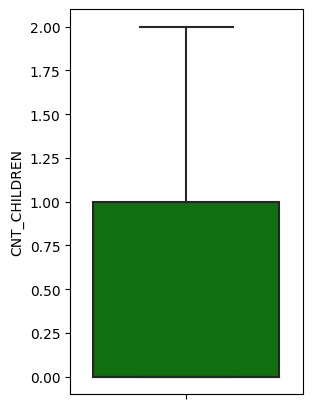

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(y=application_4['CNT_CHILDREN'], color='green', orient='v')

In [ ]:
# Run kalo semua fitur yang positif di pake
# CNT_FAM_MEMBERS
Q1 = application_3['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = application_3['CNT_FAM_MEMBERS'].quantile(0.75)

IQR = Q3-Q1 #Interquartile range
fence_low  = Q1-1.5*IQR
fence_high = Q3+1.5*IQR

application_3 = application_3.loc[(application_3['CNT_FAM_MEMBERS'] >= fence_low) & (application_3['CNT_FAM_MEMBERS'] <= fence_high)]
application_3.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE        AGE  YEARS_EMPLOYED  \
0         351000.0                    0.018801  25.920548        1.745205   
1        1129500.0                    0.003541  45.931507        3.254795   
2         135000.0                    0.010032  52.180822        0.616438   
3         297000.0                    0.008019  52.068493        8.326027   
4         513000.0                    0.028663  54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2           11.671233          6.934247           1               1   
3           26.939726          6.676712           1               1   
4           11.810959          9.473973           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.262949   
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   

   EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.139376                       0.972

<Axes: ylabel='CNT_FAM_MEMBERS'>

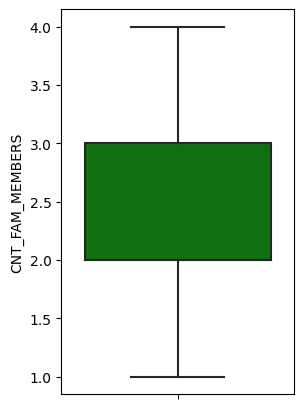

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(y=application_3['CNT_FAM_MEMBERS'], color='green', orient='v')

In [ ]:
application_4.shape

(303239, 72)

# Feature Selection

In [ ]:
application_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303239 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    303239 non-null  int64  
 1   TARGET                        303239 non-null  int64  
 2   NAME_CONTRACT_TYPE            303239 non-null  int64  
 3   CODE_GENDER                   303239 non-null  int64  
 4   FLAG_OWN_CAR                  303239 non-null  int64  
 5   FLAG_OWN_REALTY               303239 non-null  int64  
 6   CNT_CHILDREN                  303239 non-null  int64  
 7   AMT_INCOME_TOTAL              303239 non-null  float64
 8   AMT_CREDIT                    303239 non-null  float64
 9   AMT_ANNUITY                   303239 non-null  float64
 10  AMT_GOODS_PRICE               303239 non-null  float64
 11  REGION_POPULATION_RELATIVE    303239 non-null  float64
 12  AGE                           303239 non-nul

## By all feature

In [ ]:
# Membagi data menjadi fitur (X) dan target (y)

# X = application_4.drop(columns=['TARGET'])
# y = application_4['TARGET']


## by correlation

In [ ]:
# based on corr
corr_train = application_4.corr()['TARGET']

print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

LIVE_CITY_NOT_WORK_CITY        0.032374
FLAG_DOCUMENT_3                0.044361
REG_CITY_NOT_LIVE_CITY         0.044660
YEARS_EMPLOYED                 0.044938
FLAG_EMP_PHONE                 0.045979
REG_CITY_NOT_WORK_CITY         0.051038
CODE_GENDER                    0.055662
REGION_RATING_CLIENT           0.058487
REGION_RATING_CLIENT_W_CITY    0.060412
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_2              -0.160031
EXT_SOURCE_3              -0.155866
AGE                       -0.078160
YEARS_LAST_PHONE_CHANGE   -0.055064
YEARS_ID_PUBLISH          -0.051632
YEARS_REGISTRATION        -0.041885
AMT_GOODS_PRICE           -0.039632
FLOORSMAX_AVG             -0.039466
FLOORSMAX_MEDI            -0.039238
FLOORSMAX_MODE            -0.038441
Name: TARGET, dtype: float64

In [ ]:
# Mengambil kolom target
target_column = 'TARGET'
correlation_with_target = application_4.corr()['TARGET']

# Ambil fitur dengan korelasi absolut di atas ambang batas yang ditentukan
threshold_positive = 0.04
threshold_negative = -0.04

# Memilih fitur dengan korelasi di atas ambang batas
selected_features_above_threshold = correlation_with_target[correlation_with_target > threshold_positive].index.tolist()

# Memilih fitur dengan korelasi di bawah ambang batas
selected_features_below_threshold = correlation_with_target[correlation_with_target < threshold_negative].index.tolist()

# Cetak fitur-fitur terpilih
print("Fitur-fitur dengan korelasi di atas ambang batas:", selected_features_above_threshold)
print("Fitur-fitur dengan korelasi di bawah ambang batas:", selected_features_below_threshold)

Fitur-fitur dengan korelasi di atas ambang batas: ['TARGET', 'CODE_GENDER', 'YEARS_EMPLOYED', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3']
Fitur-fitur dengan korelasi di bawah ambang batas: ['AGE', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_LAST_PHONE_CHANGE']


In [ ]:
# Dataframe awal dengan fitur-fitur terpilih
selected_features = ['TARGET', 'CODE_GENDER', 'YEARS_EMPLOYED', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'AGE', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_LAST_PHONE_CHANGE']
selected_data = application_4[selected_features]

# Menggabungkan fitur-fitur terpilih menjadi satu kolom
feature_by_corr = pd.concat([selected_data['TARGET'], selected_data['CODE_GENDER'], selected_data['YEARS_EMPLOYED'], selected_data['FLAG_EMP_PHONE'], selected_data['REGION_RATING_CLIENT'], selected_data['REGION_RATING_CLIENT_W_CITY'], selected_data['REG_CITY_NOT_LIVE_CITY'], selected_data['REG_CITY_NOT_WORK_CITY'], selected_data['FLAG_DOCUMENT_3'], selected_data['AGE'], selected_data['YEARS_REGISTRATION'], selected_data['YEARS_ID_PUBLISH'], selected_data['EXT_SOURCE_2'], selected_data['EXT_SOURCE_3'], selected_data['YEARS_LAST_PHONE_CHANGE']], axis=1)

# Cetak dataframe hasil penggabungan fitur-fitur terpilih
feature_by_corr.head()

TARGET  CODE_GENDER  YEARS_EMPLOYED  FLAG_EMP_PHONE  REGION_RATING_CLIENT  \
0       1            1        1.745205               1                     2   
1       0            0        3.254795               1                     1   
2       0            1        0.616438               1                     2   
3       0            0        8.326027               1                     2   
4       0            1        8.323288               1                     2   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            1                       0   
2                            2                       0   
3                            2                       0   
4                            2                       0   

   REG_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_3        AGE  YEARS_REGISTRATION  \
0                       0                1  25.920548            9.994521   
1                       0                1  45.931507            3.249315   
2                       0                0  52.180822           11.671233   
3                       0                1  52.068493           26.939726   
4                       1                0  54.608219           11.810959   

   YEARS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_LAST_PHONE_CHANGE  
0          5.808219      0.262949      0.139376                 3.106849  
1          0.797260      0.622246      0.535276                 2.268493  
2          6.934247      0.555912      0.729567                 2.232877  
3          6.676712      0.650442      0.535276                 1.690411  
4          9.473973      0.322738      0.535276                 3.030137

# SPLIT DATA TRAIN & TEST

In [ ]:
# Membagi data menjadi fitur (X) dan target (y)
X = feature_by_corr.drop(columns=['TARGET'])
y = feature_by_corr['TARGET']

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# PROPORSI 80:20 (80% TRAINING, 20% TEST)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=1/5,random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# MODELING

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, make_scorer


## 1.Logistic Regression

In [ ]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

# Membuat model Regresi Logistik
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)

# Memprediksi data pengujian
y_pred_logreg_train = log_reg.predict(X_train_res)
y_pred_logreg_test = log_reg.predict(X_test)

# Menghitung akurasi
accuracy_train = accuracy_score(y_train_res, y_pred_logreg_train)
accuracy_test = accuracy_score(y_test, y_pred_logreg_test)

print("Akurasi Data Train:", accuracy_train)
print("Akurasi Data Test:", accuracy_test)

Akurasi Data Train: 0.6676775419815846
Akurasi Data Test: 0.6776810447170558


In [ ]:
data_train=pd.DataFrame()
data_train['actual']= y_train_res
data_train['predict']=y_pred_logreg_train

data_train.to_csv('data_prediksi_train.csv', index=False)

In [ ]:
data_test=pd.DataFrame()
data_test['actual']= y_test
data_test['predict']=y_pred_logreg_test

data_test.to_csv('data_prediksi.csv', index=False)

## 2.Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)

# Memprediksi data uji
y_pred_DT_train = dt.predict(X_train_res)
y_pred_DT_test = dt.predict(X_test)

# Menghitung akurasi
accuracy_train = accuracy_score(y_train_res, y_pred_DT_train)
accuracy_test = accuracy_score(y_test, y_pred_DT_test)

print("Akurasi Data Train:", accuracy_train)
print("Akurasi Data Test:", accuracy_test)


Akurasi Data Train: 1.0
Akurasi Data Test: 0.7494723651233347


## 3.Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_auc_score, make_scorer

# Membuat model Decision Tree
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_res, y_train_res)

# Memprediksi data uji
y_pred_NB_train = NB_classifier.predict(X_train_res)
y_pred_NB_test = NB_classifier.predict(X_test)

# Menghitung akurasi
accuracy_train = accuracy_score(y_train_res, y_pred_NB_train)
accuracy_test = accuracy_score(y_test, y_pred_NB_test)

print("Akurasi Data Train:", accuracy_train)
print("Akurasi Data Test:", accuracy_test)



Akurasi Data Train: 0.6427329047759937
Akurasi Data Test: 0.6155355493998154


##4.Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_auc_score, make_scorer

# Membuat model Decision Tree
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_res, y_train_res)

# Memprediksi data uji
y_pred_RF_train = RF_classifier.predict(X_train_res)
y_pred_RF_test = RF_classifier.predict(X_test)

# Menghitung akurasi
accuracy_train = accuracy_score(y_train_res, y_pred_RF_train)
accuracy_test = accuracy_score(y_test, y_pred_RF_test)

print("Akurasi Data Train:", accuracy_train)
print("Akurasi Data Test:", accuracy_test)

Akurasi Data Train: 1.0
Akurasi Data Test: 0.8434243503495581


##5.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_auc_score, make_scorer

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

# Memprediksi data pengujian
y_pred_KNN_train = knn.predict(X_train_res)
y_pred_KNN_test = knn.predict(X_test)

# Menghitung akurasi
accuracy_train = accuracy_score(y_train_res, y_pred_KNN_train)
accuracy_test = accuracy_score(y_test, y_pred_KNN_test)

print("Akurasi Data Train:", accuracy_train)
print("Akurasi Data Test:", accuracy_test)

Akurasi Data Train: 0.9352726001237257
Akurasi Data Test: 0.7474277799762564


# EVALUATION

> ## Evaluation Logistic Regression Model

Text(0.5, 23.52222222222222, 'Predicted label')

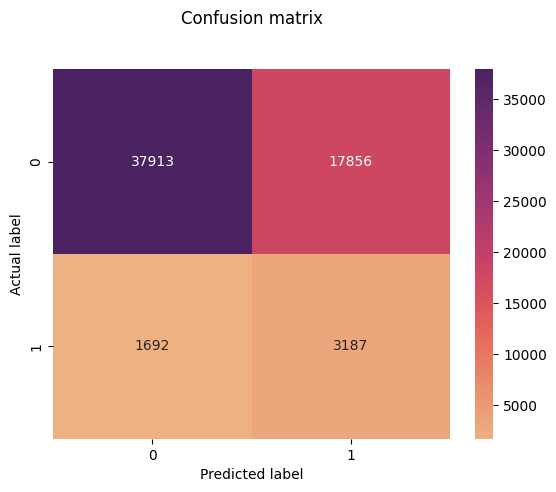

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Menghitung akurasi
# Menghitung akurasi

print("Training Accuracy  of Logistic Regression Model: " + str(accuracy_score(y_train_res, y_pred_logreg_train))[:8])
print("Testing Accuracy  of Logistic Regression Model: " + str(accuracy_score(y_test, y_pred_logreg_test))[:8])

print("\n","="*55,"\n")

# Classification Report
print("Classification Report:\n\n", classification_report(y_test, y_pred_logreg_test))
print("\n","="*55,"\n")

# ROC AUC Score
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_logreg_test))

Training Accuracy  of Logistic Regression Model: 0.667677
Testing Accuracy  of Logistic Regression Model: 0.677681


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.68      0.80     55769
           1       0.15      0.65      0.25      4879

    accuracy                           0.68     60648
   macro avg       0.55      0.67      0.52     60648
weighted avg       0.89      0.68      0.75     60648



ROC AUC Score:  0.666514873957555


> ## Evaluation Naive Bayes Model

Text(0.5, 23.52222222222222, 'Predicted label')

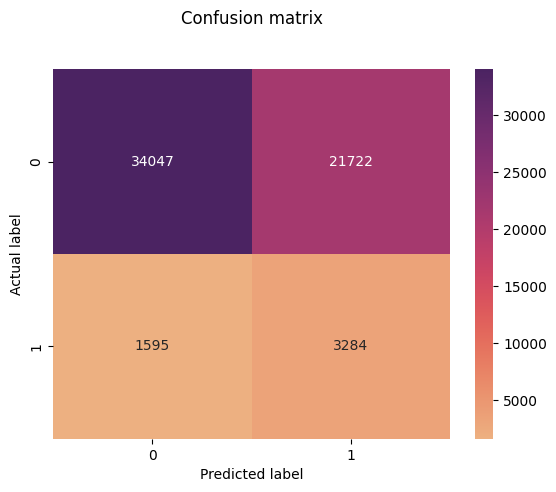

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_NB_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Menghitung akurasi

print("Training Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_train_res, y_pred_NB_train))[:8])
print("Testing Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_test, y_pred_NB_test))[:8])

print("\n","="*55,"\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred_NB_test))

print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_NB_test))

Training Accuracy  of Naive Bayes Model: 0.642732
Testing Accuracy  of Naive Bayes Model: 0.615535


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.61      0.74     55769
           1       0.13      0.67      0.22      4879

    accuracy                           0.62     60648
   macro avg       0.54      0.64      0.48     60648
weighted avg       0.89      0.62      0.70     60648



ROC AUC Score:  0.6417946024687355


> ## Evaluation Decission Tree

Text(0.5, 23.52222222222222, 'Predicted label')

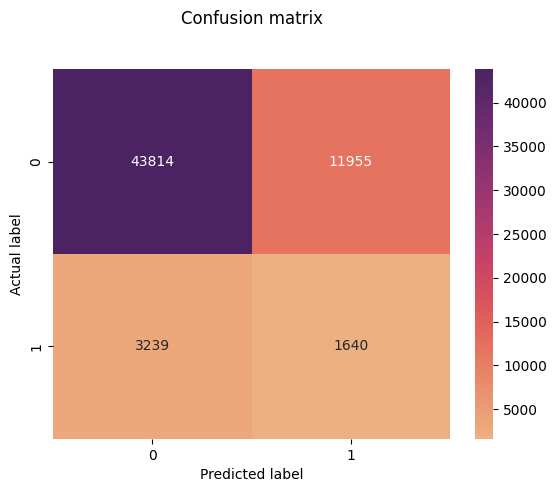

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_DT_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Menghitung akurasi

print("Training Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_train_res, y_pred_DT_train))[:8])
print("Testing Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_test, y_pred_DT_test))[:8])

print("\n","="*55,"\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred_DT_test))

print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_DT_test))

Training Accuracy  of Naive Bayes Model: 1.0
Testing Accuracy  of Naive Bayes Model: 0.749472


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.79      0.85     55769
           1       0.12      0.34      0.18      4879

    accuracy                           0.75     60648
   macro avg       0.53      0.56      0.51     60648
weighted avg       0.87      0.75      0.80     60648



ROC AUC Score:  0.5608840247533682


> ## Evaluation Random Forest

Text(0.5, 23.52222222222222, 'Predicted label')

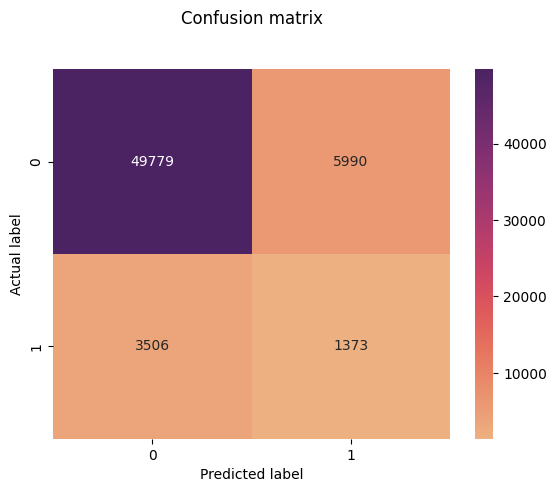

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_RF_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Menghitung akurasi

print("Training Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_train_res, y_pred_RF_train))[:8])
print("Testing Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_test, y_pred_RF_test))[:8])

print("\n","="*55,"\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred_RF_test))

print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_RF_test))

Training Accuracy  of Naive Bayes Model: 1.0
Testing Accuracy  of Naive Bayes Model: 0.843424


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.89      0.91     55769
           1       0.19      0.28      0.22      4879

    accuracy                           0.84     60648
   macro avg       0.56      0.59      0.57     60648
weighted avg       0.87      0.84      0.86     60648



ROC AUC Score:  0.5870013920148631


> ## Evaluation KNN

Text(0.5, 23.52222222222222, 'Predicted label')

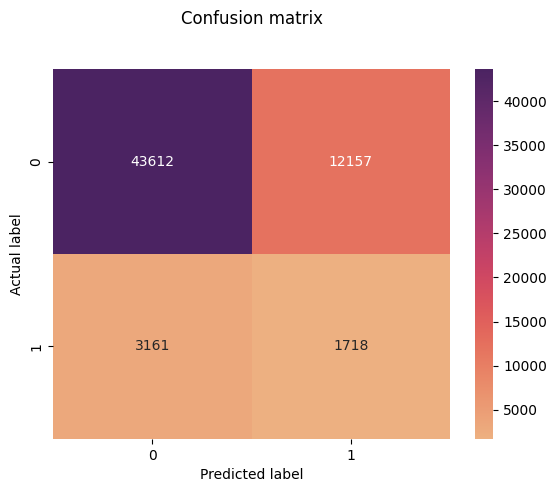

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_KNN_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Menghitung akurasi

print("Training Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_train_res, y_pred_KNN_train))[:8])
print("Testing Accuracy  of Naive Bayes Model: " + str(accuracy_score(y_test, y_pred_KNN_test))[:8])

print("\n","="*55,"\n")
print("Classification Report:\n\n", classification_report(y_test, y_pred_KNN_test))

print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_KNN_test))

Training Accuracy  of Naive Bayes Model: 0.935272
Testing Accuracy  of Naive Bayes Model: 0.747427


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.78      0.85     55769
           1       0.12      0.35      0.18      4879

    accuracy                           0.75     60648
   macro avg       0.53      0.57      0.52     60648
weighted avg       0.87      0.75      0.80     60648



ROC AUC Score:  0.5670664240555934


> ## ROC AUC

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

def model_performance(model):
  cv = cross_val_score(model, X_train, y_train, cv=5)
  print('-----',model.__class__.__name__,'-----')
  print('Scores: \t',cv)
  print('Scores mean: \t',cv.mean())
  return cv.mean()

def model_performance_roc(model):
  y_pred = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")
  y_score = y_pred[:, 1]
  auc_score = roc_auc_score(y_train, y_score)
  print('ROC AUC score: \t', auc_score)
  return {'y_score': y_score, 'auc_score': auc_score}

def plot_model_performance(performances):
  perf_vals = list(performances.values())
  names = list(performances.keys())

  min = np.min(perf_vals)
  max = np.max(perf_vals)

  plt.figure(figsize=(20, 10))
  sns.barplot(x=names, y=perf_vals)

  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(perf_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Algorithm performance (min - 0.01, max + 0.01)')

def plot_roc_performance(roc_performances):
  auc_vals = list(map(lambda x: x['auc_score'], roc_performances.values()))
  names = list(roc_performances.keys())

  min = np.min(auc_vals)
  max = np.max(auc_vals)

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  for name, perf in roc_performances.items():
    fpr, tpr, _ = roc_curve(y_train, perf['y_score'])
    plt.plot(fpr, tpr, '--', label=name)

  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.title('ROC curve')

  plt.subplot(122)
  sns.barplot(x=names, y=auc_vals)
  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(auc_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Area under curve (min - 0.01, max + 0.01)')

def plot_models_performance(models, roc=True):
  performances = dict.fromkeys(models, 0.0)
  roc_performances = dict.fromkeys(models, {'y_score': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    performance = model_performance(model)
    roc_performance = model_performance_roc(model)
    performances[name] = performance
    roc_performances[name] = roc_performance

  plot_model_performance(performances)
  if roc:
    plot_roc_performance(roc_performances)



----- GaussianNB -----
Scores: 	 [0.86547538 0.86574055 0.86372068 0.86334968 0.86112371]
Scores mean: 	 0.8638820005961467
ROC AUC score: 	 0.6800162075909119
----- DecisionTreeClassifier -----
Scores: 	 [0.8554793  0.8493961  0.85428089 0.85382745 0.85001443]
Scores mean: 	 0.852599631150102
ROC AUC score: 	 0.5344426366358539
----- RandomForestClassifier -----
Scores: 	 [0.91937179 0.91961746 0.91974113 0.91943196 0.91934952]
Scores mean: 	 0.9195023728439239
ROC AUC score: 	 0.6979298961544711
----- KNeighborsClassifier -----
Scores: 	 [0.90294524 0.9011707  0.90347912 0.90238674 0.90168597]
Scores mean: 	 0.9023335547828107
ROC AUC score: 	 0.5658037351888978
----- LogisticRegression -----
Scores: 	 [0.91949546 0.91961746 0.91961746 0.91941135 0.91965868]
Scores mean: 	 0.919560082874581
ROC AUC score: 	 0.7244391849974081


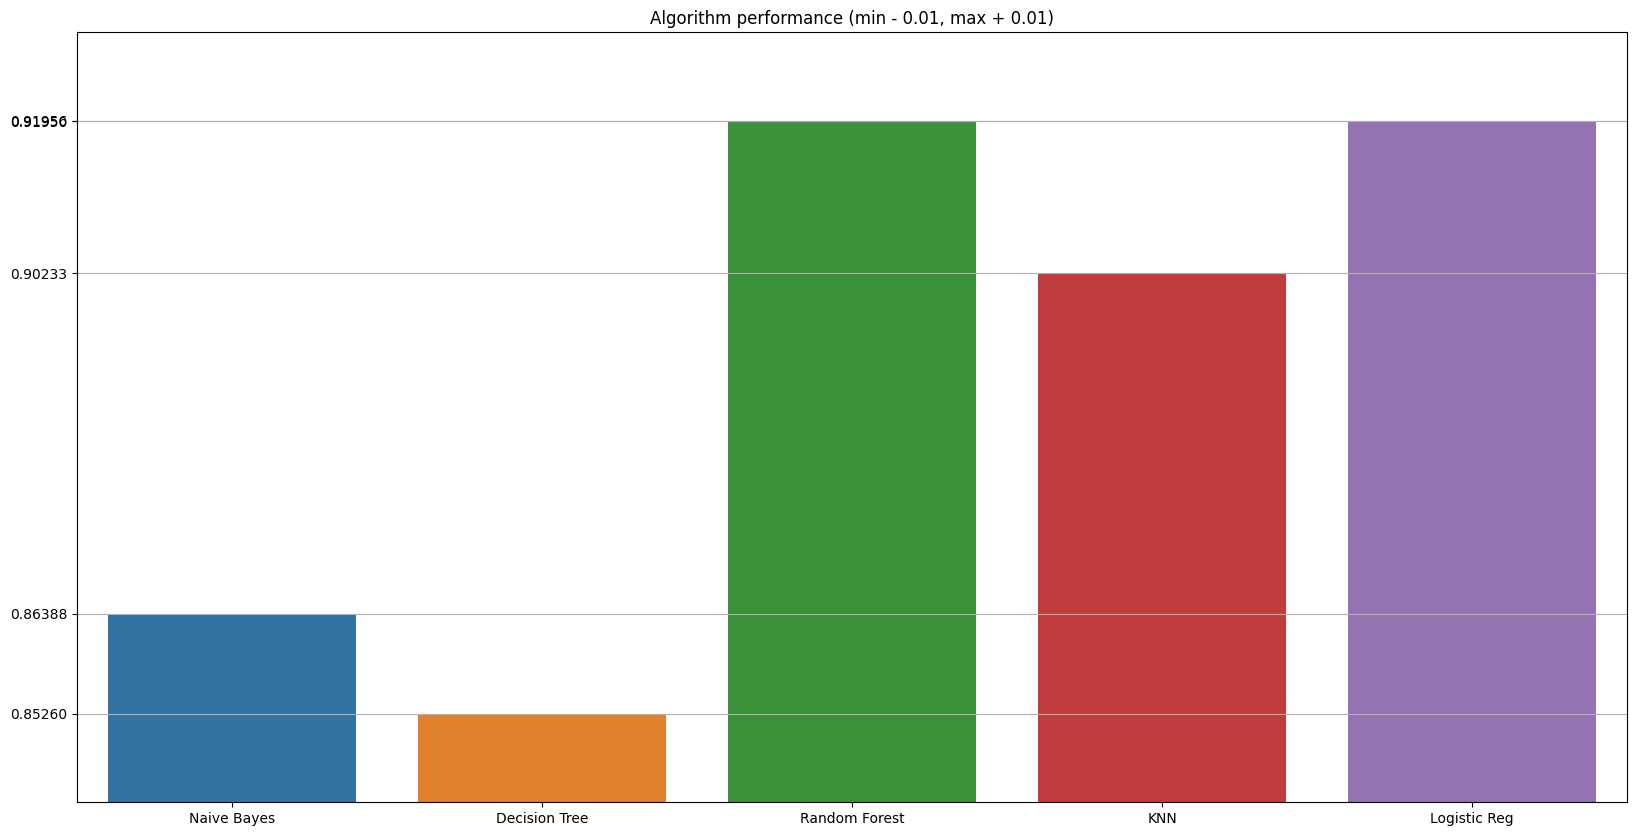

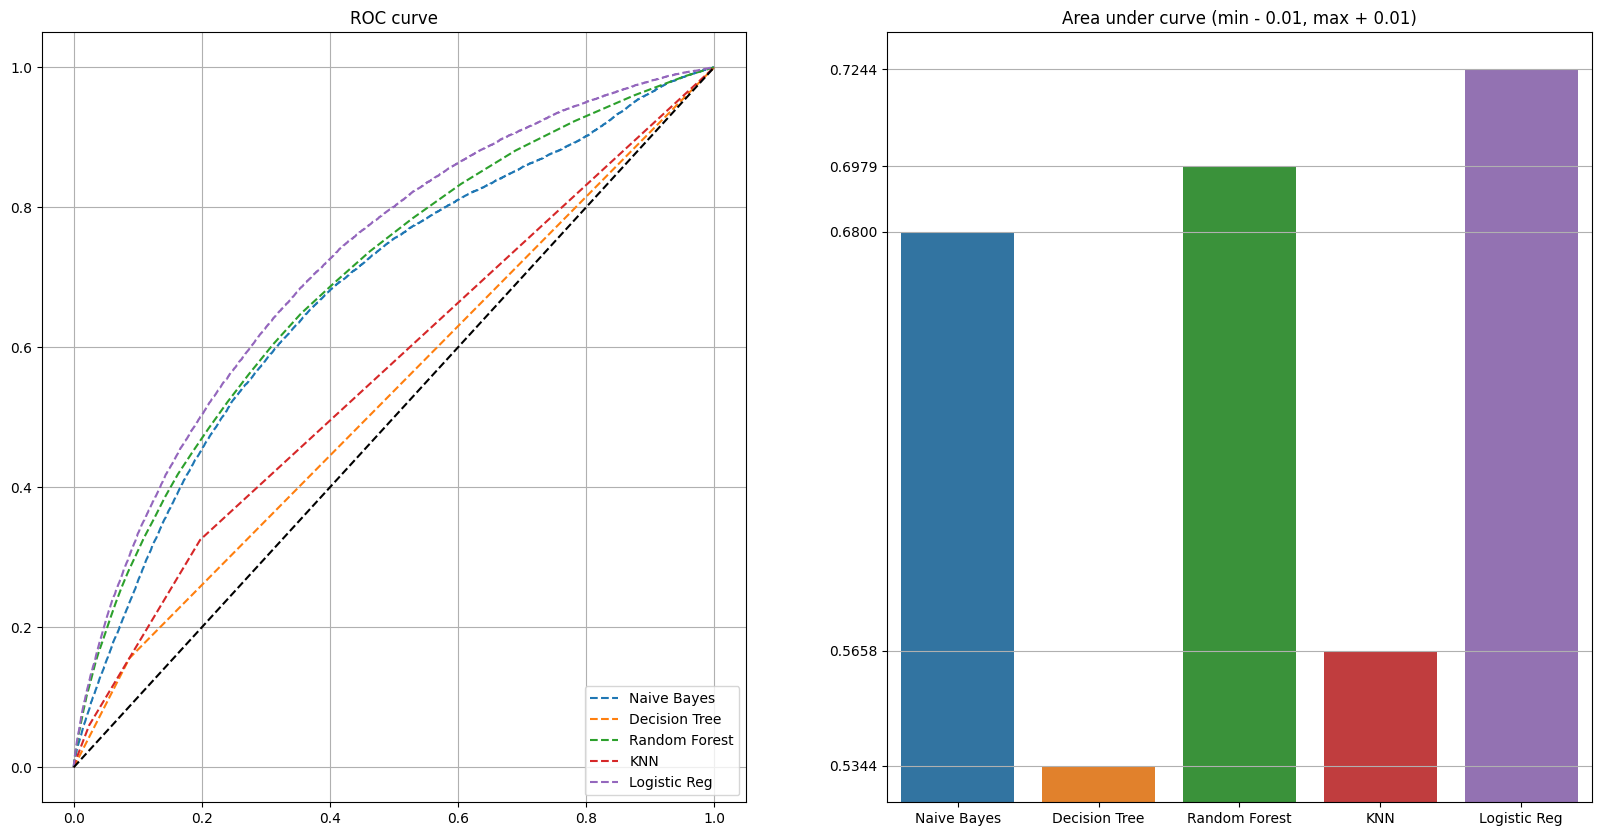

In [ ]:
models = {'Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'Logistic Reg': LogisticRegression()}


plot_models_performance(models)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

def model_performance(model):
  cv = cross_val_score(model, X_train_res, y_train_res, cv=5)
  print('-----',model.__class__.__name__,'-----')
  print('Scores: \t',cv)
  print('Scores mean: \t',cv.mean())
  return cv.mean()

def model_performance_roc(model):
  y_pred = cross_val_predict(model, X_train_res, y_train_res, cv=5, method="predict_proba")
  y_score = y_pred[:, 1]
  auc_score = roc_auc_score(y_train_res, y_score)
  print('ROC AUC score: \t', auc_score)
  return {'y_score': y_score, 'auc_score': auc_score}

def plot_model_performance(performances):
  perf_vals = list(performances.values())
  names = list(performances.keys())

  min = np.min(perf_vals)
  max = np.max(perf_vals)

  plt.figure(figsize=(20, 10))
  sns.barplot(x=names, y=perf_vals)

  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(perf_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Algorithm performance (min - 0.01, max + 0.01)')

def plot_roc_performance(roc_performances):
  auc_vals = list(map(lambda x: x['auc_score'], roc_performances.values()))
  names = list(roc_performances.keys())

  min = np.min(auc_vals)
  max = np.max(auc_vals)

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  for name, perf in roc_performances.items():
    fpr, tpr, _ = roc_curve(y_train_res, perf['y_score'])
    plt.plot(fpr, tpr, '--', label=name)

  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.title('ROC curve')

  plt.subplot(122)
  sns.barplot(x=names, y=auc_vals)
  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(auc_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Area under curve (min - 0.01, max + 0.01)')

def plot_models_performance(models, roc=True):
  performances = dict.fromkeys(models, 0.0)
  roc_performances = dict.fromkeys(models, {'y_score': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    performance = model_performance(model)
    roc_performance = model_performance_roc(model)
    performances[name] = performance
    roc_performances[name] = roc_performance

  plot_model_performance(performances)
  if roc:
    plot_roc_performance(roc_performances)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

def model_performance(model):
  cv = cross_val_score(model, X_test, y_test, cv=5)
  print('-----',model.__class__.__name__,'-----')
  print('Scores: \t',cv)
  print('Scores mean: \t',cv.mean())
  return cv.mean()

def model_performance_roc(model):
  y_pred = cross_val_predict(model, X_test, y_test, cv=5, method="predict_proba")
  y_score = y_pred[:, 1]
  auc_score = roc_auc_score(y_test, y_score)
  print('ROC AUC score: \t', auc_score)
  return {'y_score': y_score, 'auc_score': auc_score}

def plot_model_performance(performances):
  perf_vals = list(performances.values())
  names = list(performances.keys())

  min = np.min(perf_vals)
  max = np.max(perf_vals)

  plt.figure(figsize=(20, 10))
  sns.barplot(x=names, y=perf_vals)

  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(perf_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Algorithm performance (min - 0.01, max + 0.01)')

def plot_roc_performance(roc_performances):
  auc_vals = list(map(lambda x: x['auc_score'], roc_performances.values()))
  names = list(roc_performances.keys())

  min = np.min(auc_vals)
  max = np.max(auc_vals)

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  for name, perf in roc_performances.items():
    fpr, tpr, _ = roc_curve(y_test, perf['y_score'])
    plt.plot(fpr, tpr, '--', label=name)

  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.title('ROC curve')

  plt.subplot(122)
  sns.barplot(x=names, y=auc_vals)
  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(auc_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Area under curve (min - 0.01, max + 0.01)')

def plot_models_performance(models, roc=True):
  performances = dict.fromkeys(models, 0.0)
  roc_performances = dict.fromkeys(models, {'y_score': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    performance = model_performance(model)
    roc_performance = model_performance_roc(model)
    performances[name] = performance
    roc_performances[name] = roc_performance

  plot_model_performance(performances)
  if roc:
    plot_roc_performance(roc_performances)
